# Crash Course in Causality Worked Examples
### Author: Yanyan Chen (002799697)

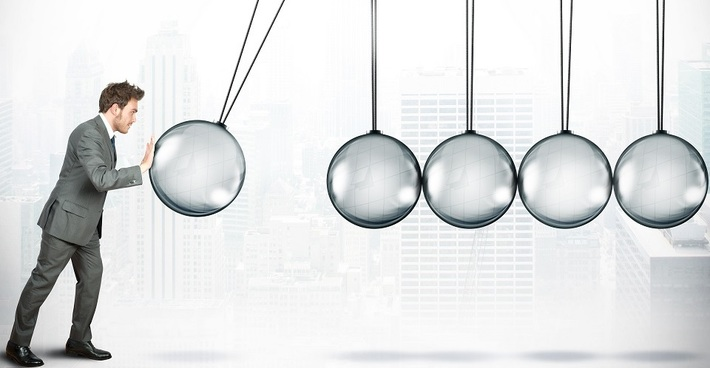


# Introduction

In the diverse and dynamic field of data science, understanding the principle of causality stands as a cornerstone for meaningful data analysis and interpretation. This notebook is an essential guide dedicated to exploring this fundamental concept. As data science projects span various stages, including data collection, cleaning, and modeling, it becomes clear that causality analysis is a vital yet challenging part of the process. It is not just the collection or cleaning of data that shapes the outcome, but the ability to discern causal relationships that truly drives valuable insights.

Causality, or the relationship between cause and effect, is a subtle yet powerful force in data science. Misinterpretation of causality can lead to erroneous conclusions, flawed policy decisions, and ineffective strategies. The difficulty lies in distinguishing between mere correlation and true causation, especially in complex datasets. This course aims to demystify this challenge by delving into the theories and methodologies for identifying causal relationships in data.

Through this tutorial, participants will embark on a journey to understand the intricacies of causality in data science. We will explore various causality models and techniques, such as Randomized Controlled Trials, Difference-in-Differences, Propensity Score Matching, Instrumental Variables (IV), LiNGAM. Participants will learn how to apply these methods to real-world data, discerning hidden causal connections and understanding their implications. This course will equip data science practitioners and enthusiasts with the necessary tools to make informed decisions based on a deeper understanding of causality. By the end of this tutorial, attendees will have gained a comprehensive understanding of causality, its importance in data analysis, and the skills to apply causal inference methods confidently and effectively in their work.

In the worked example section, we will have a deeper understanding of causal inference through two real-world practical examples.


# Worked Example 1 - Inferreing Causality in Water Quality
After learning more about the various aspects of causality, let's do a practical exercise in causal inference using a real example to feel the magic of causal inference!

First, we now move on to the dataset we are going to work on.

# Dataset

Water quality is one of the most important factors in a healthy ecosystem. Clean water supports a diversity of plants and wildlife. Though it may seem unrelated at first, our actions on land affect the quality of our water. Pollutants, excessive nutrients from fertilizers, and sediment frequently get carried into local lakes and rivers via runoff from urban areas or agricultural fields.

Scientists measure a variety of properties to determine water quality. These include temperature, acidity (pH), dissolved solids (specific conductance), particulate matter (turbidity), dissolved oxygen, hardness, and suspended sediment. Each reveals something different about the health of a water body.


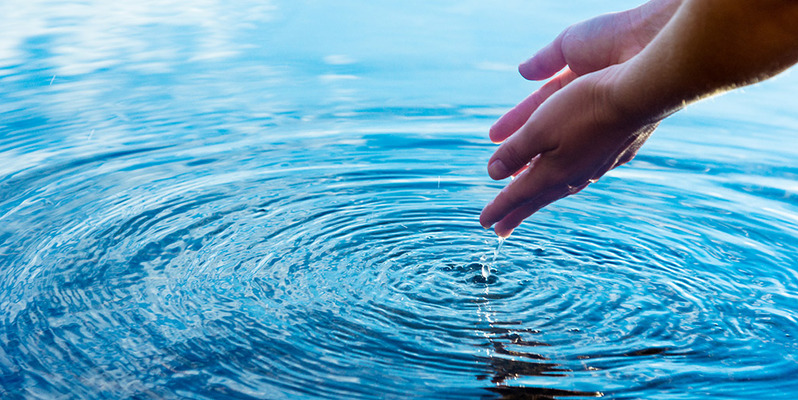

The following water properties are important in determining water quality:

* **Temperature:** Water temperature is important to fish and aquatic plants. Temperature can affect the level of oxygen, as well as the ability of organisms to resist certain pollutants.

* **Acidity – pH:** The measurement of pH is a measure of the amount of hydrogen ions (H+) present in a substance such as water. Knowing the amount of hydrogen in a substance allows us to judge whether it is acidic, neutral, or basic.

* **Dissolved Oxygen:** A small amount of oxygen, about ten molecules of oxygen per million molecules of water, is dissolved in water. Fish and microscopic organisms need dissolved oxygen to survive.

* **Turbidity:** Turbidity makes the water cloudy or opaque. Turbidity is the amount of particulate matter (such as clay, silt, plankton, or microscopic organisms) suspended in water.

* **Specific Conductance:** Specific conductance measures the capacity of water to conduct an electrical current. It depends on the number of dissolved solids, such as salt, in the water.

* **Biochemical Oxygen Demand (BOD)** is a measure of the amount of oxygen required to remove waste organic matter from water in the process of decomposition by aerobic bacteria (those bacteria that live only in an environment containing oxygen). Higher BOD indicates more oxygen is required, which is less for oxygen-demanding species to feed on, and signifies lower water quality. Inversely, low BOD means less oxygen is being removed from water, so water is generally purer.

* **Nitrite and Nitrate** - Nitrate and nitrite are soluble compounds containing nitrogen and oxygen. In the environment, nitrite (NO2 - ) generally converts to nitrate (NO3 - ), which means nitrite occurs very rarely in groundwater. Nitrate is essential for plant growth and is present in all vegetables and grains. For this reason, the predominant use of nitrate in industry is for fertilizer. Nitrite is used for curing meats, manufacturing explosives, and for maintenance of industrial boilers. According to the World Health Organization, the average American male consumes 9-22 milligrams of nitrate-N per day primarily from leafy greens and root vegetables like carrots, beets, and radishes. Average nitrite-N consumption is much lower at 0.1-0.8 mg per day, primarily from cured meats. Intake at these levels is not considered a health risk.

* **Fecal coliform** - A fecal coliform is a facultatively anaerobic, rod-shaped, gram-negative, non-sporulating bacterium. Coliform bacteria generally originate in the intestines of warm-blooded animals. In general, increased levels of fecal coliforms provide a warning of failure in water treatment, a break in the integrity of the distribution system, and possible contamination with pathogens. When levels are high there may be an elevated risk of waterborne gastroenteritis. Tests for the bacteria are cheap, reliable, and rapid (1-day incubation).

For context, coliform must be below 104 MPN/100 mL, preferably absent from water for it to be considered safe for general human use, and for irrigation where coliform may cause disease outbreaks from contaminated-water in agriculture.

# Step 1: Importing package / libraries

To start, we should include essential libraries that will facilitate data handling, neural network construction, and result visualization. Key libraries like pandas, numpy, matplotlib, seaborn are instrumental in this process. They enable efficient data manipulation, model development and training, as well as clear presentation of outcomes. The integration of these libraries streamlines our tasks, allowing us to concentrate on the critical aspects of coding and implementation.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Load raw data

This part of the task involves importing data from a specified file path and then storing it in a pandas DataFrame. Here, we first uploaded the dataset to GitHub and then passed the dataset from GitHub to import it as raw data.

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/Water_pond_tanks.csv',encoding='cp1252')

In [ ]:
df.head()

STN\nCode                        Name of Monitoring Location  \
0     4368.0      KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)   
1     2353.0  KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...   
2     1790.0                       PULICATE LAKE , NELLORE DIST   
3     4391.0      CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI   
4     4921.0           ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR   

  Type Water Body      State Name  Temperature\n?C (Min)  \
0            LAKE  ANDHRA PRADESH                   24.0   
1            LAKE  ANDHRA PRADESH                   26.0   
2            LAKE  ANDHRA PRADESH                   18.0   
3            TANK  ANDHRA PRADESH                   22.0   
4         Wetland  ANDHRA PRADESH                   21.0   

   Temperature\n?C (Max) Dissolved Oxygen (mg/L) (Min)  \
0                   27.0                           3.2   
1                   29.0                           3.0   
2                   24.0                           4.2   
3                   29.0                           5.4   
4                   30.0                           5.4   

  Dissolved Oxygen (mg/L) (Max) pH (Min)  pH (Max)  \
0                           6.5      7.0       8.0   
1                           6.8      6.9       7.8   
2                           6.0      7.2       8.2   
3                           6.2      6.3       7.9   
4                           6.5      7.3       8.0   

  Conductivity (?mhos/cm) (Min) Conductivity (?mhos/cm) (Max)  \
0                           245                          5160   
1                           599                          1179   
2                         28000                         56900   
3                           180                           476   
4                           496                           734   

  BOD (mg/L) (Min) BOD (mg/L) (Max) Nitrate N + Nitrite N(mg/L) (Min)  \
0              1.6              3.2                              1.02   
1              1.9              4.6                              0.77   
2              2.4              2.8                              1.20   
3              1.0              2.5                              0.34   
4              1.0              2.3                              0.35   

  Nitrate N + Nitrite N(mg/L) (Max) Fecal Coliform (MPN/100ml) (Min)  \
0                              3.60                                9   
1                              3.56                               15   
2                              1.64                                3   
3                              2.30                               24   
4                              1.00                               43   

  Fecal Coliform (MPN/100ml) (Max) Total Coliform (MPN/100ml) (Min)  \
0                               21                              120   
1                               23                              150   
2                                3                               47   
3                              365                              170   
4                              289                              240   

  Total Coliform (MPN/100ml) (Max)  
0                              210  
1                              240  
2                              150  
3                              549  
4                              727

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      620 non-null    object 
 7   Dissolved Oxygen (mg/L) (Max)      620 non-null    object 
 8   pH (Min)                           620 non-null    object 
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      618 non-null    object 
 11  Conductivity (?mhos/cm) (Max)      618 non-null    object 

From this part we can see that:

1. The dataset has both categorical data and numeric data.
2. There are 12 independent variables of the raw data i.e. Temperature °C (Min), Temperature °C (Max)， Dissolved Oxygen (mg/L) (Max), Dissolved Oxygen (mg/L) (Min), pH (Min), pH (Max), Conductivity (mhos/cm) (Min), Conductivity (mhos/cm) (Max), BOD (mg/L) (Min), BOD (mg/L) (Max), Nitrate N + Nitrite N(mg/L) (Min), Nitrate N + Nitrite N(mg/L) (Max),

# Step 3: Data Preprocessing

Now for better data analysis, let's do the preprocessing. Next we will do a couple of things like this:

1. First, replace all '-' characters in the DataFrame with np.nan (i.e. NaN, for missing values). This is a common step in data cleaning to convert a particular token (in this case '-') to the standard form used in Python to represent missing values.

In [ ]:
df=df.replace('-', np.nan)

2. Use a regular expression (regex=True) to find all strings containing '\n4' and replace them with the empty string. This step is to remove some specific unwanted characters or formatting errors.

In [ ]:
df=df.replace('\n4', '',regex=True)

3. Converts all data types in the DataFrame from column 5 to column 19 (indexes start at 0 in Python) to floating point numbers (float). This is usually done to ensure consistency and correctness of numerical data, especially before performing numerical operations or model training.

In [ ]:
df.iloc[:,4:19]=df.iloc[:,4:19].astype(float)

4. Convert the data type of the column named 'Total Coliform (MPN/100ml) (Max)' to a floating point number.

In [ ]:
df['Total Coliform (MPN/100ml) (Max)']=df['Total Coliform (MPN/100ml) (Max)'].astype(float)

Prints out summary information about the DataFrame, including the name of each column, count of non-null values, and data type. This step is useful for quickly seeing the structure of the dataset and checking that the data type conversion was successful.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      618 non-null    float64
 7   Dissolved Oxygen (mg/L) (Max)      618 non-null    float64
 8   pH (Min)                           620 non-null    float64
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      615 non-null    float64
 11  Conductivity (?mhos/cm) (Max)      615 non-null    float64

In [ ]:
df['State Name'].unique()

array(['ANDHRA PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH',
       'DELHI', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL\nPRADESH',
       'JAMMU &\nKASHMIR', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA\nPRADESH', 'MADHYA PRADESH',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'TAMIL NADU', 'TELANGANA',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [ ]:
df['Type Water Body'].unique()

array(['LAKE', 'TANK', 'Wetland', 'POND'], dtype=object)

Now we can see that most data is all correctly processed, and obviously, there are now a few of null values in the dataset. We can also see that there are only four types of Type Water Body in the data and they are 'LAKE', 'TANK', 'Wetland', 'POND'.

# Step 4: Visualization

**1) Distplot by features**

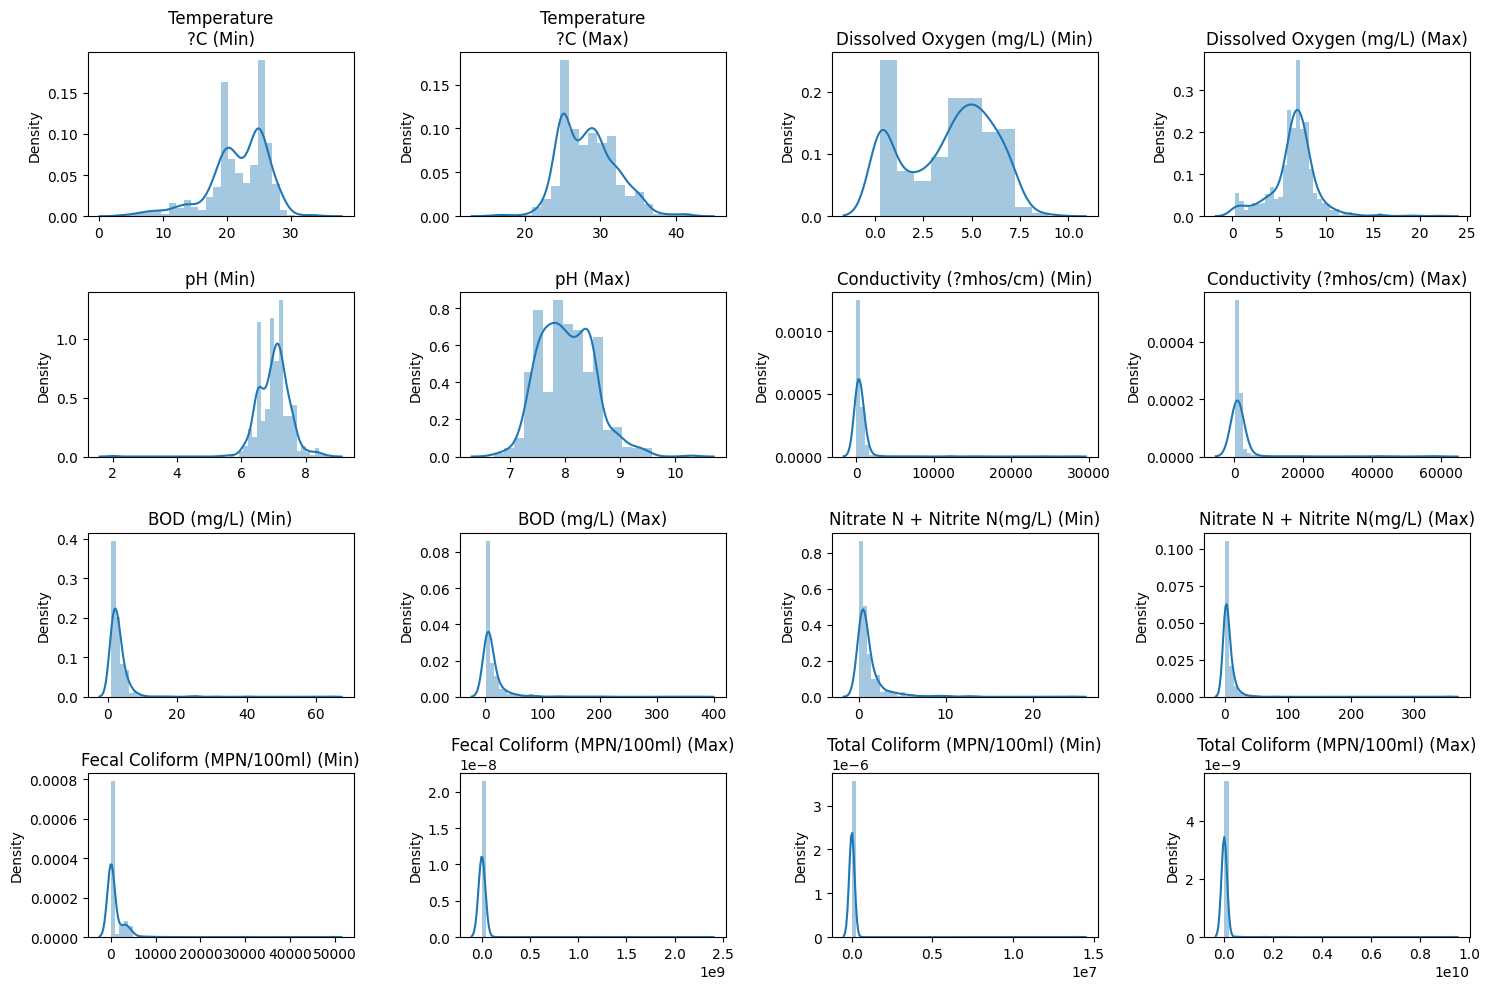

In [ ]:
col=['Temperature\n?C (Min)', 'Temperature\n?C (Max)',
       'Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)',
       'pH (Min)', 'pH (Max)', 'Conductivity (?mhos/cm) (Min)',
       'Conductivity (?mhos/cm) (Max)', 'BOD (mg/L) (Min)', 'BOD (mg/L) (Max)',
       'Nitrate N + Nitrite N(mg/L) (Min)',
       'Nitrate N + Nitrite N(mg/L) (Max)', 'Fecal Coliform (MPN/100ml) (Min)',
       'Fecal Coliform (MPN/100ml) (Max)', 'Total Coliform (MPN/100ml) (Min)',
       'Total Coliform (MPN/100ml) (Max)']
fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(4,4,i+1)
    plt.title(col[i])
    sns.distplot(df,x=df[col[i]])
plt.tight_layout()
plt.show()

The image is a series of distribution plots (distplots) for various water quality parameters, each represented for minimum and maximum values. These plots are used to visualize the distribution of a dataset to understand its skewness, peakness, and other attributes.

From the image, we can see the distribution of the following water quality parameters:

* Temperature (°C): There are two plots showing the distribution of minimum and maximum temperatures. We can see that whether it is the Max temperature or the Min temperature, most water temperatures are basically in the range of 20-30 degrees.

* pH: The pH level distributions also have two plots for minimum and maximum values. pH measures the acidity or basicity of the water. We can see that the ph(Max) is around neutral (ph=7), and the max value is around 8, which shows that the water is alkaline.

* Dissolved Oxygen (mg/L): Oxygen levels in water are crucial for aquatic life. The minimum values are skewed towards the lower end, which could be concerning for the environment, whereas the maximum values are more normally distributed. They are also towards the low end. Because normal dissolved oxygen should be around 8.

* Conductivity (μmhos/cm): Both minimum and maximum values show a right-skewed distribution.

* BOD (Biochemical Oxygen Demand) (mg/L): Both the minimum and maximum plots suggest most samples have low BOD.

* Nitrate N + Nitrite N (mg/L): The plots show a high peak at the lower end, suggesting low concentrations in most samples.

* Fecal Coliform (MPN/100ml) and Total Coliform (MPN/100ml): Indicates the presence of fecal contamination. The distplots for both minimum and maximum values show most samples have low coliform counts.


Note that while all three values (BOD, Nitrate N + Nitrite N, Fecal Coliform) are on the low end of the graph. However, we need to pay attention to the unit as well as the water quality requirements for these three indicators, from the data, can be reflected in the existence of a certain degree of water quality pollution

**2) Boxplot by features**

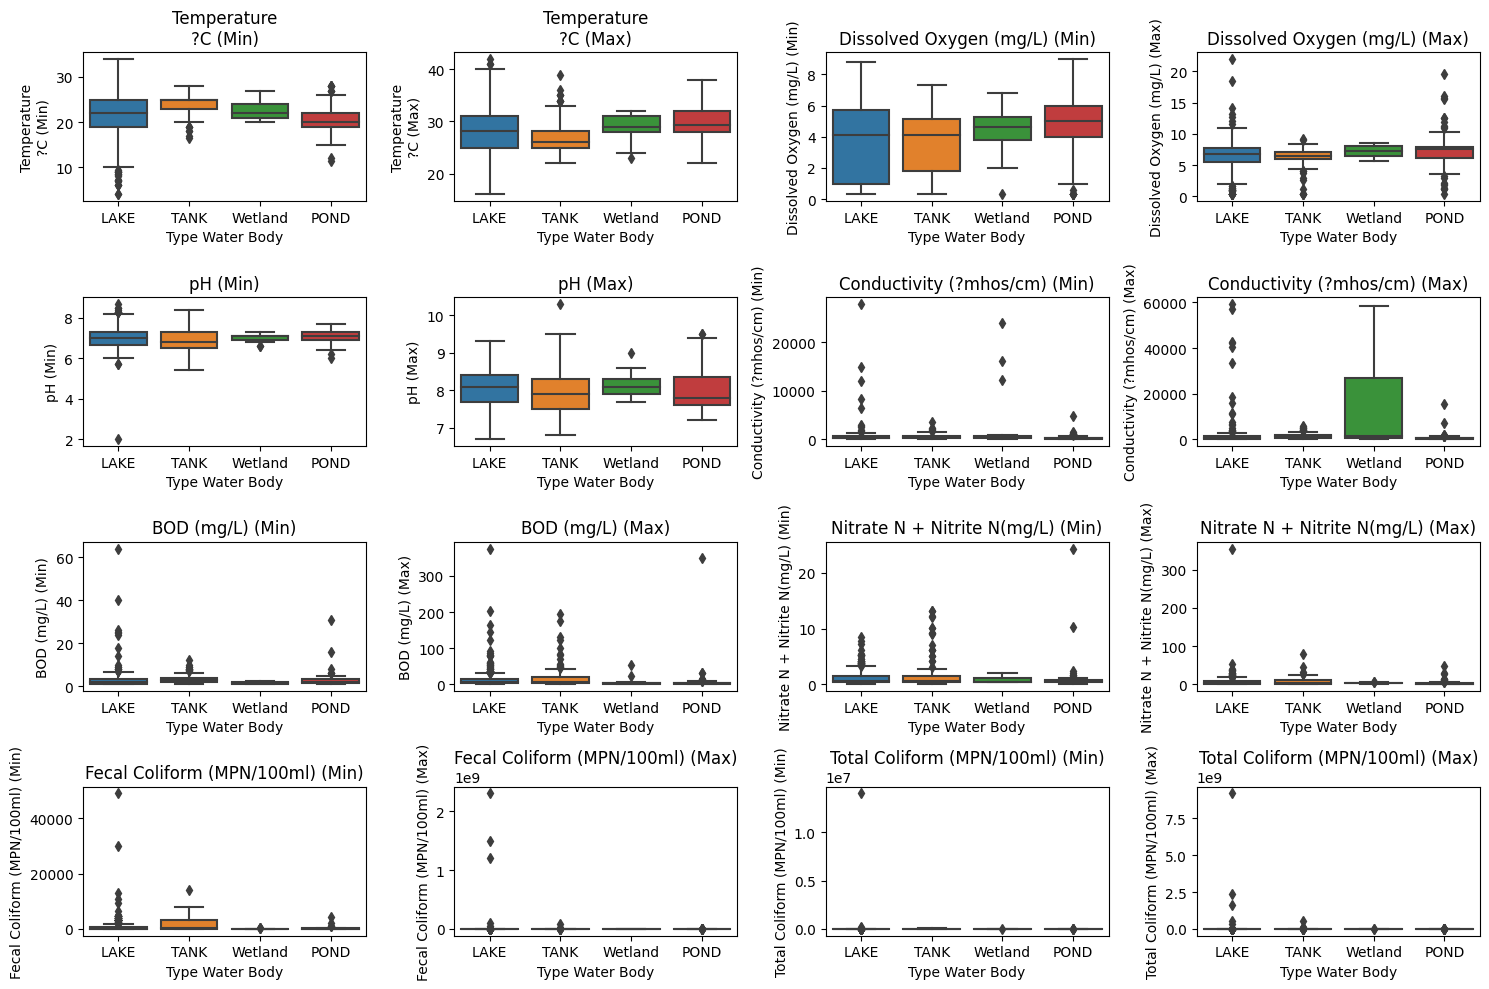

In [ ]:
fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(4,4,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,y=df[col[i]],x=df['Type Water Body'])
plt.tight_layout()
plt.show()

The image contains a series of boxplots for various water quality parameters across different types of water bodies, including lakes, tanks, wetlands, and ponds. Boxplots are useful for visualizing the distribution of data, indicating the median, quartiles, and potential outliers within the dataset. Here’s an analysis based on the provided boxplots:

* Temperature (°C) Min and Max: The boxplots show the range of temperatures in each type of water body. It appears that lakes have a wider range of temperatures compared to ponds, tanks, and wetlands.

* pH Min and Max: For pH(Min) levels across different water bodies are fairly consistent, with medians close to neutral (pH 7). There are a few outliers, particularly in the max pH for tanks, suggesting instances of higher pH levels. The pH (maximum) levels of different water bodies basically fluctuate around 8, proving that the overall water quality is still alkaline.

* Dissolved Oxygen (mg/L) Min and Max: Dissolved oxygen levels vary across the different water bodies, with ponds showing a larger interquartile range for the minimum values. There are outliers indicating very high maximum dissolved oxygen levels in some cases.

* Conductivity (μmhos/cm) Min and Max: Conductivity shows significant variation, particularly in the max values for wetlands, indicating that some wetland samples have very high mineral or salt content.

* BOD (Biochemical Oxygen Demand) (mg/L) Min and Max: The BOD levels are generally higher in lakes and tanks, with some extreme values indicated by outliers, especially for maximum BOD levels.

* Nitrate N + Nitrite N (mg/L) Min and Max: The concentration of nitrate and nitrite is generally low across all water bodies, with some exceptions as indicated by the outliers.

* Fecal Coliform (MPN/100ml) and Total Coliform (MPN/100ml) Min and Max: Fecal coliform concentrations are mostly low, but there are some extremely high outliers, especially in lakes and ponds for maximum values.

**3) Pairplot by Type Water Body**

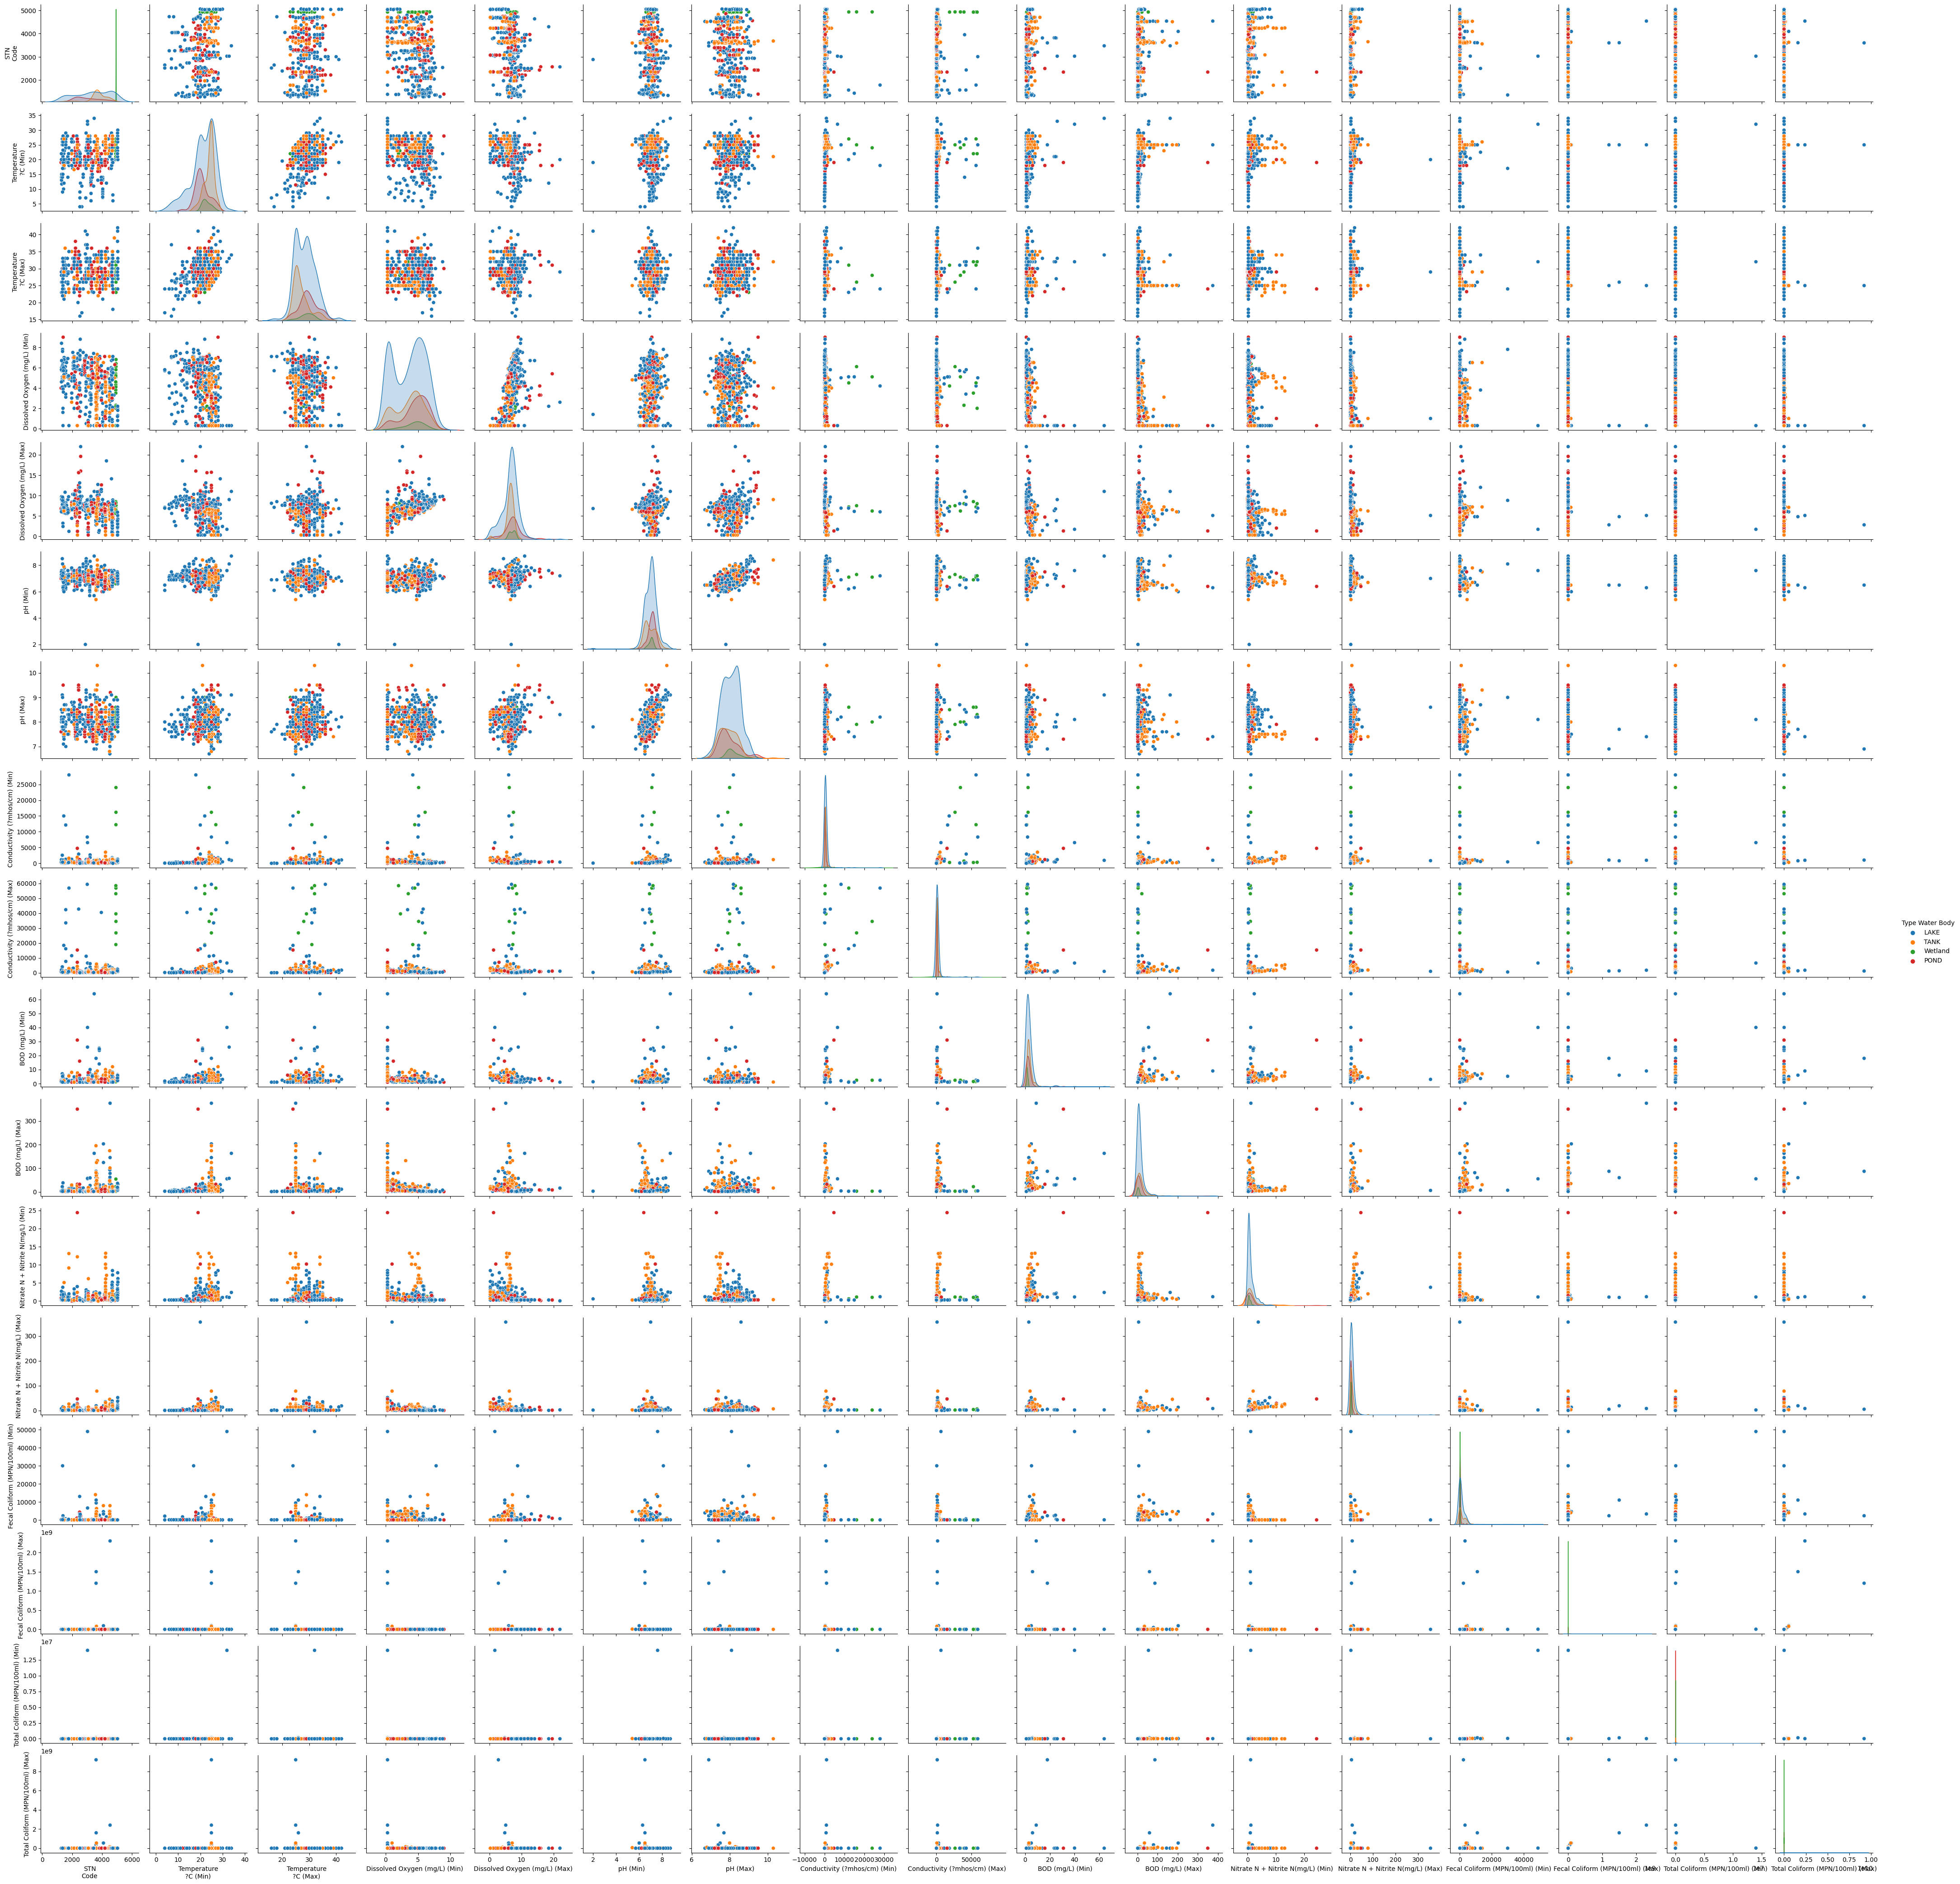

In [ ]:
sns.pairplot(df,hue='Type Water Body');

**4) Correlation heatmap**

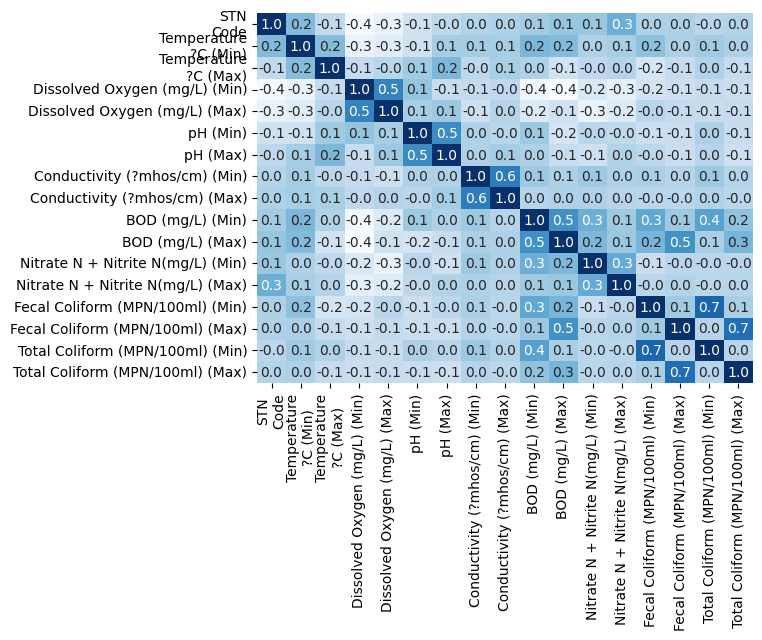

In [ ]:
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f');

From the picture of Correlation heatmap and Pairplot by Type Water Body, **It seems to be difficult to find "strong correlation" among features, except min and max of same features.**

**In the article "What Are The 6 Main Indicators Of Water Quality" by AtlasScientific(https://atlas-scientific.com/blog/what-are-the-main-indicators-of-water-quality/), we can find some tips, for example,**

**1. Temperature & Dissolved Oxygen (DO)**

Water temperature is one of the most important factors affecting water systems. Temperature can affect dissolved oxygen levels, chemical and biological processes, species compositions, water density and stratification, and life-stages in different marine organisms.

For optimal health in aquatic organisms, the temperature must be within their optimal range. Anything outside this range can have detrimental effects on aquatic life; increasing stress levels and often causing death. The reproductive stage (spawning & embryo development) in fish is the most temperature-sensitive period. Temperature also affects ammonia levels in the water, the rate of photosynthesis, metabolic rates in aquatic organisms, and how sensitive aquatic organisms are to pollution.

Due to changes in external environmental conditions, water temperatures fluctuate throughout the day, and between seasons. The temperature in freshwater systems is heated by the sun, and although other water inputs such as precipitation, groundwater, and surface runoff can affect water temperatures, heat is either lost or gained via condensation and evaporation.

The temperature of water affects the amount of dissolved oxygen (DO) water can hold. As water temperatures increase, the amount of DO in water decreases. DO is the amount of oxygen dissolved in water, which can also fluctuate both daily and seasonally.

DO comes from both the atmosphere and photosynthesis from aquatic plants, which is depleted via chemical oxidation and respiration from aquatic organisms (including microorganisms), mostly through decomposition of organic material and plant biomass. The solubility of oxygen in water has an optimal pressure of 1 atm (atmospheric pressure) that ranges from ~15 mg/L at 0ºC to 8 mg/L at 30ºC.

Large fluctuations in DO can damage environmental ecosystems that are influenced by stream-flow runoff, precipitation, and temperature changes. Fish and other aquatic animals and plants need DO to survive. Some organisms can adapt to changes, however, the majority are not able to. DO can also affect the solubility and availability of nutrients in the water.

**So we can try lmplot between  temperature and dissolved oxygen by type water body.**

**1) x='Temperature (Max)', y='Dissolved Oxygen (mg/L) (Max)', hue="Type Water Body"**

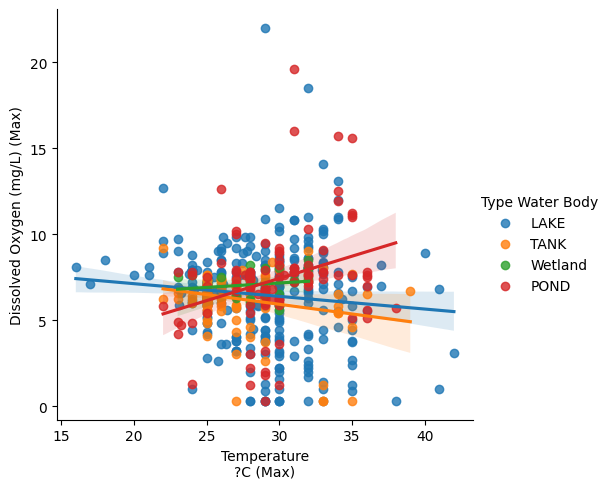

In [ ]:
sns.lmplot(data=df,x='Temperature\n?C (Max)',y='Dissolved Oxygen (mg/L) (Max)',hue="Type Water Body");

**Maximum Temperature vs. Maximum Dissolved Oxygen:**

* As maximum temperature increases, maximum dissolved oxygen levels tend to decrease across all types of water bodies.
* Lakes and tanks show a more pronounced decrease in oxygen levels with increasing temperature compared to wetlands and ponds.

**2) x='Temperature (Min)', y='Dissolved Oxygen (mg/L) (Max)', hue="Type Water Body"**

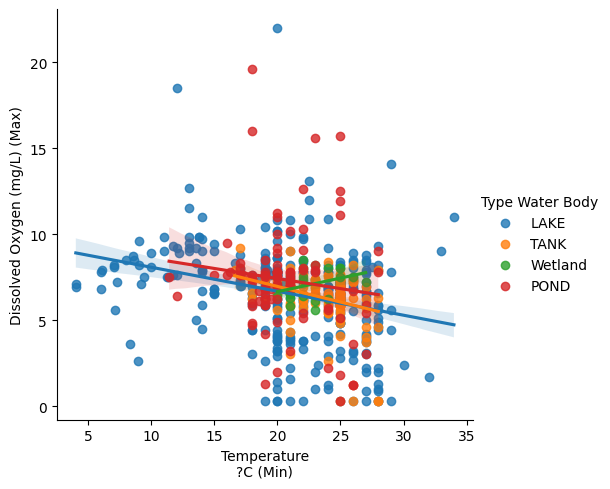

In [ ]:
sns.lmplot(data=df,x='Temperature\n?C (Min)',y='Dissolved Oxygen (mg/L) (Max)',hue="Type Water Body");

**Minimum Temperature vs. Maximum Dissolved Oxygen:**

* As minimum temperature increases, maximum dissolved oxygen levels tend to decrease across all types of water bodies.

**3) x='Temperature (Max)', y='Dissolved Oxygen (mg/L) (Min)', hue="Type Water Body"**

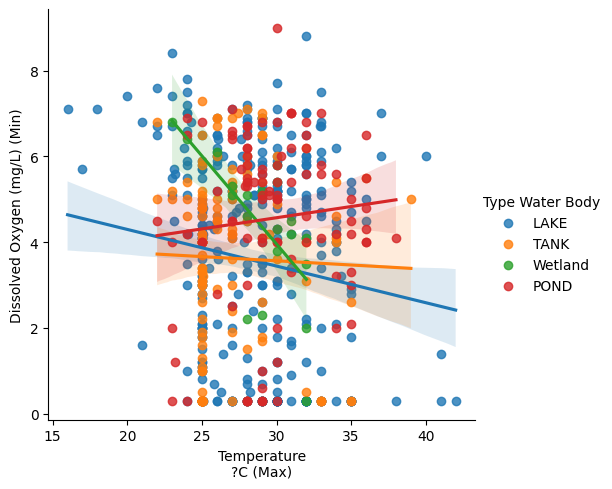

In [ ]:
sns.lmplot(data=df,x='Temperature\n?C (Max)',y='Dissolved Oxygen (mg/L) (Min)',hue="Type Water Body");

**Maximum Temperature vs. Minimum Dissolved Oxygen:**

* There is a visible decrease in minimum dissolved oxygen levels as maximum temperatures rise, but the relationship seems less pronounced than with maximum dissolved oxygen levels.
* This relationship varies by water body type, with some (like wetlands) showing a steeper decline than others.

**4) x='Temperature (Min)', y='Dissolved Oxygen (mg/L) (Max)', hue="Type Water Body"**

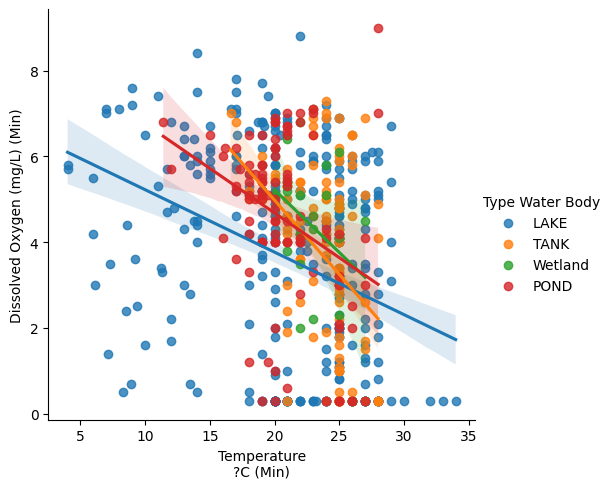

In [ ]:
sns.lmplot(data=df,x='Temperature\n?C (Min)',y='Dissolved Oxygen (mg/L) (Min)',hue="Type Water Body");

**Minimum Temperature vs. Minimum Dissolved Oxygen:**

* The relationship between minimum temperature and minimum dissolved oxygen levels also shows a general decrease in oxygen levels with an increase in temperature. However, the scatter of data points suggests high variability.

The data from these plots suggest that temperature has an inverse relationship with dissolved oxygen levels in water bodies, with higher temperatures generally corresponding to lower oxygen levels. However, the strength of this relationship varies depending on whether you are looking at maximum or minimum levels of temperature and dissolved oxygen. Additionally, the type of water body also influences this relationship, with each type exhibiting different patterns of change in oxygen levels relative to temperature.

**And another tip we can find in the article "What Are The 6 Main Indicators Of Water Quality" by AtlasScientific(https://atlas-scientific.com/blog/what-are-the-main-indicators-of-water-quality/) are**

**2. Conventional Variables: pH, Total Dissolved Solids (TDS), Conductivity, & Suspended Sediment**

Conventional variables are indicators that are measured to understand aquatic environments, including drainage basins, local environmental conditions, and daily and seasonal changes.

pH (potential of hydrogen) is a measurement of hydrogen ion concentration with a scale of 0-14 where 7 is neutral, more than 7 is alkaline, and less than 7 is acidic. The pH in most natural water environments is between 6.0 and 8.5. pH values below 4.5 and higher than 9.5 are considered lethal to aquatic organisms, and pH values less extreme can interfere with reproduction and other essential biological processes.

Metals, salts, and organic compounds can be affected by pH. In highly acidic water, some minerals dissolve in water, releasing metals and other chemical substances. pH levels can change from different water inputs such as runoff from land, groundwater, and even water draining from forest areas where weak organic acids and organic matter can alter pH levels.

The concentration of total dissolved solids (TDS) is the measurement of dissolved material in a solution. TDS includes solutes (sodium, calcium, magnesium, chloride, and bicarbonate) that remain as a solid residue after water evaporation in a solution/sample.

The main sources of TDS are:

Natural weathering
Mining
Industrial waste
Agriculture
Sewage
High levels of TDS diminish water quality, making it unsuitable for drinking and irrigation. Generally, freshwater has a TDS level between 0 and 1,000 mg/L. This is dependent on regional geology, climate and weathering processes, and other geographical characteristics that affect sources of DO and transport to water systems.

Conductivity is the measurement of conducting an electrical current that is expressed in units of µS/cm (microsiemens per centimeter). In rivers and lakes that have an outflow, the conductivity usually ranges from 10 to 1,000 µS/cm.

In water, the higher the ion concentration, the more current can be conducted. Conductivity is dependent on the number of electrical ion charges, ion mobility, and temperature.

Suspended sediment is the mass of sediment transported by a fluid like water, measured in mg/L. Particles are transported via flowing water and settle when water flow is reduced. Most suspended sediments consist of silt and clay.

During periods of increased water flow, for example from rainfall, the concentration of suspended sediment usually increases. Increased suspended sediment levels decrease light penetration in water and allows water to absorb more heat energy, increasing water temperatures. High concentrations of suspended sediment can move plants, invertebrates, and other aquatic life that live in stream beds. Increased concentrations can also affect food sources, decreasing aquatic fish populations.

**So we can try lmplot between conductivity and pH by type water body.**

**1) x='Conductivity (Max)', y='pH (Max)', hue="Type Water Body"**

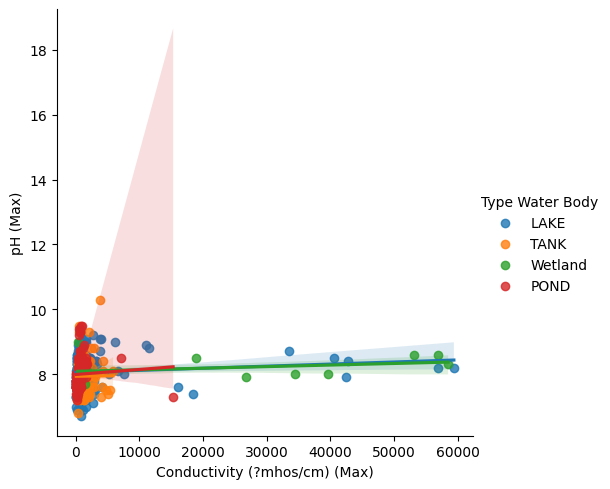

In [ ]:
sns.lmplot(data=df,x='Conductivity (?mhos/cm) (Max)',y='pH (Max)',hue="Type Water Body");

**Maximum pH vs. Maximum Conductivity:**

* There is a cluster of data points at lower conductivity levels, suggesting that in most cases, water bodies maintain a pH level within a relatively narrow range despite changes in conductivity.
* A few outliers with high pH and low conductivity are present, particularly in ponds, which might be due to specific environmental conditions or measurement inaccuracies.

**2) x='Conductivity (Min)', y='pH (Max)', hue="Type Water Body"**

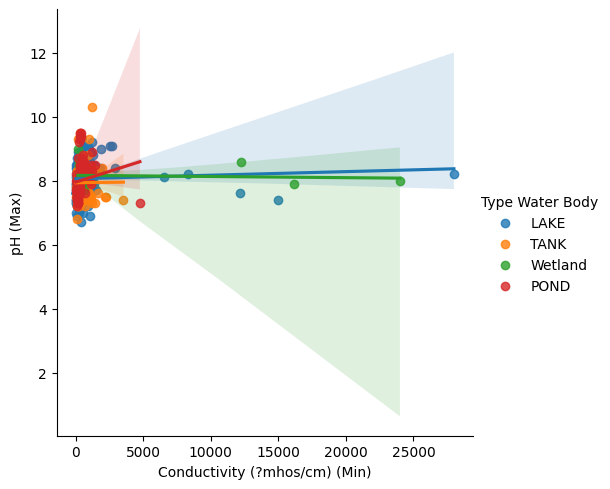

In [ ]:
sns.lmplot(data=df,x='Conductivity (?mhos/cm) (Min)',y='pH (Max)',hue="Type Water Body");

**Maximum pH vs. Minimum Conductivity:**

* The trend is similar to the first plot, with most data points clustered at the lower range of conductivity and showing no significant change in pH.

**3) x='Conductivity (Max)', y='pH (Min)', hue="Type Water Body"**

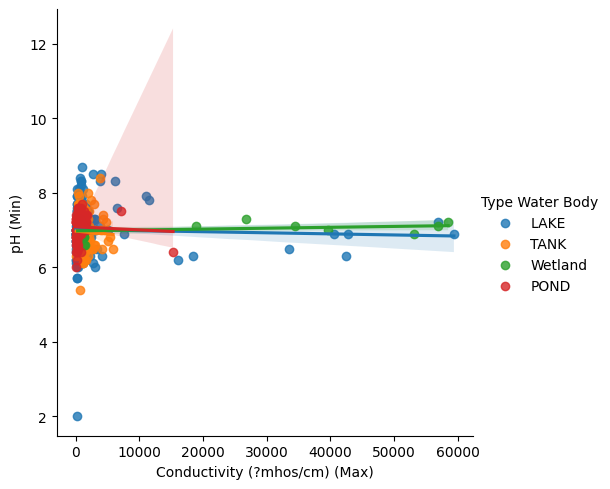

In [ ]:
sns.lmplot(data=df,x='Conductivity (?mhos/cm) (Max)',y='pH (Min)',hue="Type Water Body");

**Minimum pH vs. Maximum Conductivity:**

* Data points are spread across a wide range of conductivity levels, but pH remains relatively stable, especially for lakes, tanks, and wetlands.
* Ponds show more variability in pH at higher levels of conductivity, suggesting they may be more sensitive to changes in mineral content or other conductive substances in water.

**4) x='Conductivity (Min)', y='pH (Min)', hue="Type Water Body"**

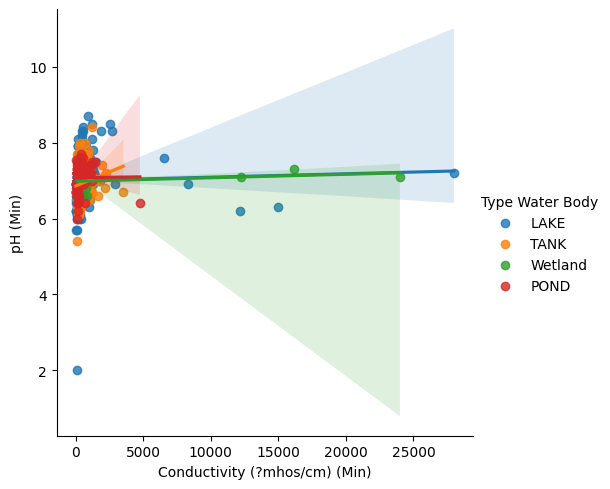

In [ ]:
sns.lmplot(data=df,x='Conductivity (?mhos/cm) (Min)',y='pH (Min)',hue="Type Water Body");

**Minimum pH vs. Minimum Conductivity:**

* Similar to the second plot, most water bodies maintain a stable pH at lower levels of conductivity.

Across all water body types, pH levels tend to remain relatively stable across varying conductivity levels, especially at lower conductivities. There is no strong or consistent trend suggesting a direct relationship between pH and conductivity; rather, pH levels appear to be influenced by a combination of factors beyond just conductivity.

Outliers in the data indicate that specific conditions or factors can lead to significant deviations from the general patterns observed. It's also possible that the buffering capacity of water bodies, which helps maintain pH stability, is playing a significant role in these observations.

Further analysis would be necessary to understand the underlying reasons for the observed patterns and to determine if the outliers represent true anomalies or data collection inconsistencies.

# Step 5: Causal Inference by LiNGAM

One of the main advantages of LinGAM is that it can handle both instantaneous and lagged causal effects. It also works well with high-dimensional data where many variables need to be considered. The causal maps generated help to identify key drivers of a system, predict the effects of interventions, and understand the underlying mechanisms of complex processes.

**I refered "KJMAN678/casual_reasoning_lignum("https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb) for coding.**

**1) Importing**

In [ ]:
pip install lingam

In [ ]:
pip install pygam

In [ ]:
pip install factor_analyzer

In [ ]:
!pip install category_encoders

from IPython.display import Image
import category_encoders as ce

import graphviz
import lingam
from lingam.utils import make_dot, make_prior_knowledge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


**2) Data Preprocessing**

In [ ]:
df1 = df.drop(["STN\nCode","Name of Monitoring Location"], axis=1)

In [ ]:
df1 = df1.dropna(how='any')

In [ ]:
display(pd.DataFrame(df1.isnull().sum()).T)

Type Water Body  State Name  Temperature\n?C (Min)  Temperature\n?C (Max)  \
0                0           0                      0                      0   

   Dissolved Oxygen (mg/L) (Min)  Dissolved Oxygen (mg/L) (Max)  pH (Min)  \
0                              0                              0         0   

   pH (Max)  Conductivity (?mhos/cm) (Min)  Conductivity (?mhos/cm) (Max)  \
0         0                              0                              0   

   BOD (mg/L) (Min)  BOD (mg/L) (Max)  Nitrate N + Nitrite N(mg/L) (Min)  \
0                 0                 0                                  0   

   Nitrate N + Nitrite N(mg/L) (Max)  Fecal Coliform (MPN/100ml) (Min)  \
0                                  0                                 0   

   Fecal Coliform (MPN/100ml) (Max)  Total Coliform (MPN/100ml) (Min)  \
0                                 0                                 0   

   Total Coliform (MPN/100ml) (Max)  
0                                 0

In [ ]:
oe = ce.ordinal.OrdinalEncoder(
    cols=df1.select_dtypes(include="object")
    )

df_en = oe.fit_transform(df1)

In [ ]:
df_list = df1.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

18
{'Type Water Body': 0, 'State Name': 1, 'Temperature\n?C (Min)': 2, 'Temperature\n?C (Max)': 3, 'Dissolved Oxygen (mg/L) (Min)': 4, 'Dissolved Oxygen (mg/L) (Max)': 5, 'pH (Min)': 6, 'pH (Max)': 7, 'Conductivity (?mhos/cm) (Min)': 8, 'Conductivity (?mhos/cm) (Max)': 9, 'BOD (mg/L) (Min)': 10, 'BOD (mg/L) (Max)': 11, 'Nitrate N + Nitrite N(mg/L) (Min)': 12, 'Nitrate N + Nitrite N(mg/L) (Max)': 13, 'Fecal Coliform (MPN/100ml) (Min)': 14, 'Fecal Coliform (MPN/100ml) (Max)': 15, 'Total Coliform (MPN/100ml) (Min)': 16, 'Total Coliform (MPN/100ml) (Max)': 17}


**3) Setting prior knowledge**
* Exogenous_variables :"Type Water Body", "State Name"
* Causal relationship : "pH (Max)" and "pH (Min)", 'Temperature\n?C (Min)' and 'Temperature\n?C (Max)', 'Dissolved Oxygen (mg/L) (Min)' and 'Dissolved Oxygen (mg/L) (Max)'

In [ ]:
#code by "https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb

prior_knowledge = make_prior_knowledge(
    18,
    exogenous_variables = [df_dict["Type Water Body"], df_dict["State Name"]],
    paths = [
             [df_dict["pH (Max)"], df_dict["pH (Min)"],[df_dict['Temperature\n?C (Min)'],df_dict['Temperature\n?C (Max)'],df_dict['Dissolved Oxygen (mg/L) (Min)'],df_dict['Dissolved Oxygen (mg/L) (Max)']]],
             ],

)

**4) LiNGAM Modeling**

In [ ]:
#code by "https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb

model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df_en)

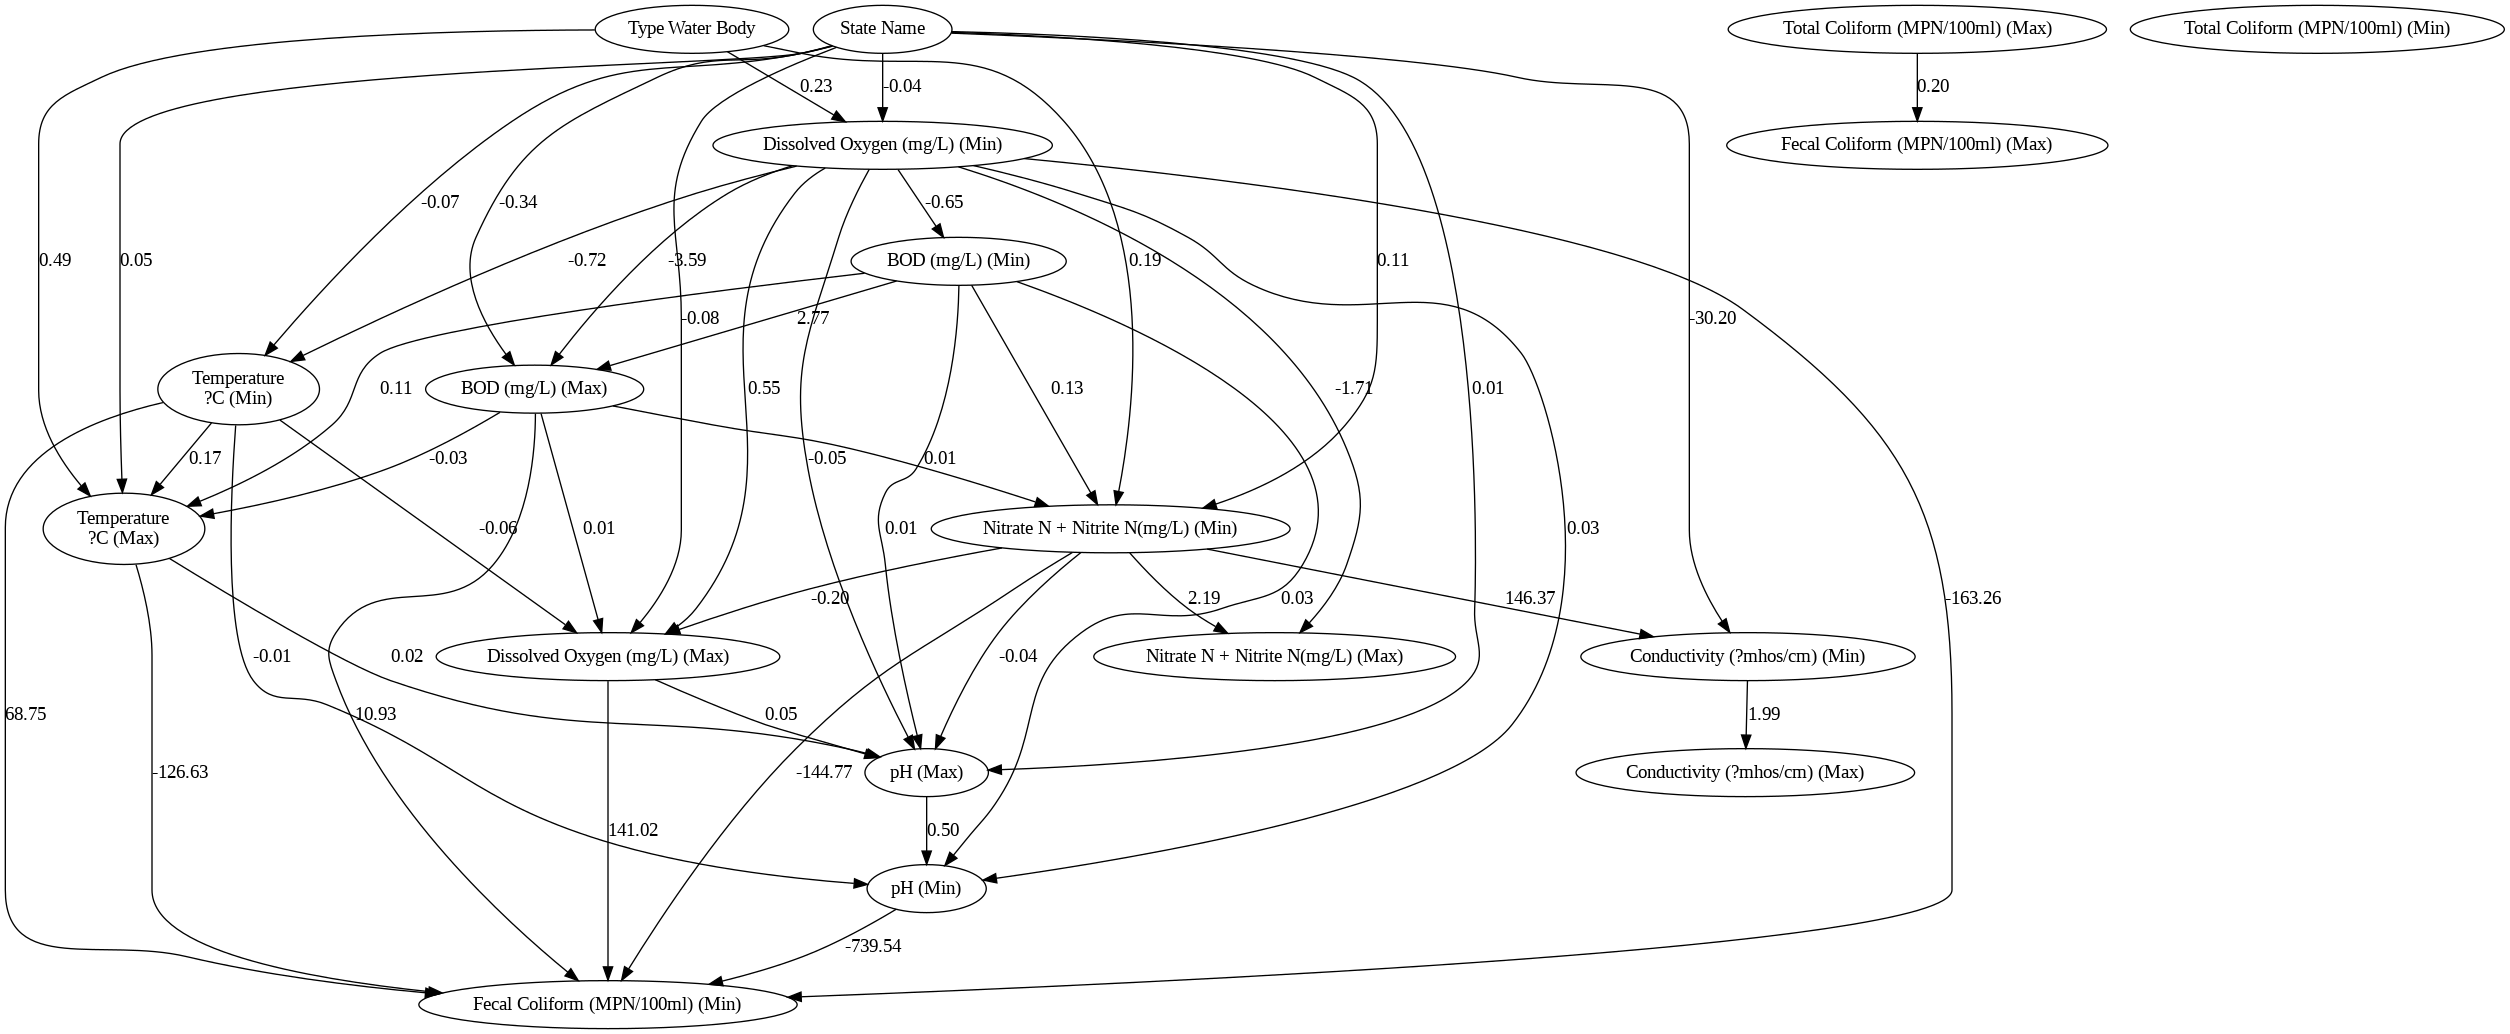

In [ ]:
#code by "https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb

dot = make_dot(
    model.adjacency_matrix_,
     labels=df_en.columns.to_list(),
    )


dot.format = 'png'
dot.render('dag')

Image("dag.png")

After completing the model fitting process, the code creates a visual representation of the causal connections using the 'make_dot' function from the 'graphviz' library. This diagram, known as a causal graph, illustrates the causal relationships discovered by the LiNGAM algorithm. Each node in the graph corresponds to a variable from the input data, and the connections between these nodes signify the causal links identified by the algorithm. The orientation of these connections, indicated by the arrowheads, points from the causal variable to the affected variable, thereby mapping out the direction of causality.

* **As can be seen from the above figure, all 12 independent variables, Temperature(Max/Min), pH(Max/Min), Dissolved Oxygen(Max/Min), Conductivity(Max/Min), BOD(Max/Min), Nitrate N + Nitrite N(Max/Min) can be the cause of changes in fecal coliform, including Type Water Body and State.**

* **Among them, PH (Min) has the greatest impact with the highest coefficient.**

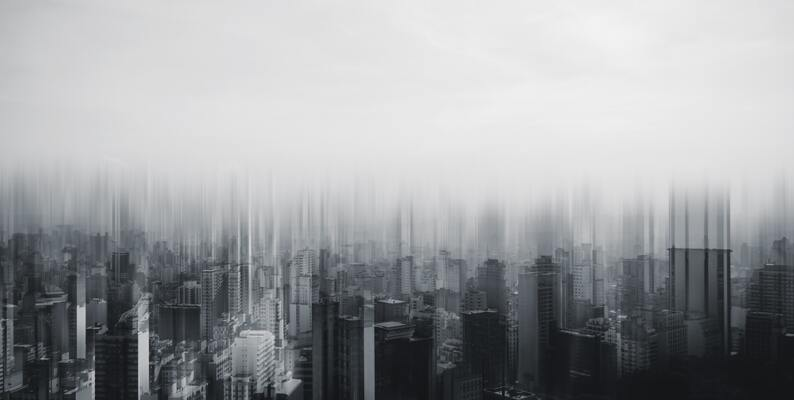


# Worked Example 2 - Inferreing Causality in What Makes Life Expectancy Longer (Suicide Rate and Life Expectancy)

Life expectancy in the US has dropped once again, thanks in part to rising suicide and drug overdose rates, according to new government reports. The Centers for Disease Control (CDC) found nearly 70,000 more Americans died in 2017 than 2016, with rising rates of death among 25- to 44-year-olds. The CDC found suicide became the second leading cause of death for 10- to 34-year-olds in 2016, with rates increasing 33% between 1999 and 2017, according to the report. Urban-area suicide rates were 16% higher in 2017 than 1999, and rural-area suicides increased by 53% over the same time period.

# Dataset

Now let's use a completely new data set to explore its causality, which is Suicide Rate and Life Expectancy from Kaggle.

There are two datasets in Suicide rate and life expectancy Dataset:

1. Life expectancy contains information about life expectancy for men and for women, happiness score and fertility rate.
2. Suicide Rate contains information about the suicide rate and GDP per capita on each country.

Life expectancy contains 5 columns, they are:

* **Country:** Name of the country.
* **Life Expectancy (years) - Men:** Life expectancy for men. The unit is years. This metric measures the average number of years a male infant is expected to live if current mortality rates continue for the rest of his life.
* **Life Expectancy (years) - Women:** Life expectancy for women. The unit is years. This metric measures the average number of years a female infant is expected to live if current mortality rates continue for the rest of her life.
* **Happiness Score:** Happiness score, life satisfaction score. This score typically reflects the average level of happiness reported by individuals in a country. It's usually derived from survey data where people rate their own happiness. The Happiness Score index ranges from 0 to 10.
* **Fertility Rate (births per woman):** This is the average number of children a woman would have over her lifetime based on current birth rates.

Suicide Rate contains

* **Country:** Name of the country.
* **GDP per capita:** GDP per capita in US dollars. Gross Domestic Product (GDP) per capita is a measure of a country's economic output that accounts for its number of people. It divides the country's GDP by its total population, making it a useful measure of a country's standard of living.
* **Suicide rate:** Suicide rate per 100.000 people. This is typically measured as the number of suicide deaths in a year per 100,000 population. It's a critical public health indicator and can reflect underlying societal issues like mental health support, economic conditions, and cultural factors.

# Step 1: Importing package / libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
%matplotlib inline

!pip install plotly

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Step 2: Load raw data

This part of the task involves importing data from a specified file path and then storing it in a pandas DataFrame. Here, we first uploaded the dataset to GitHub and then passed the dataset from GitHub to import it as raw data.

In [ ]:
df_life=pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/Life%20expectancy.csv')
df_suicide=pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/Suicide%20Rate.csv')

In [ ]:
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            142 non-null    object 
 1   Life Expectancy (years) - Men      142 non-null    float64
 2   Life Expectancy (years) - Women    142 non-null    float64
 3   Happiness Score                    142 non-null    float64
 4   Fertility Rate (births per woman)  142 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.7+ KB


In [ ]:
df_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         140 non-null    object 
 1   GDP per capita  140 non-null    object 
 2   Suicide rate    140 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.4+ KB


In [ ]:
df_life.head()

Country  Life Expectancy (years) - Men  \
0  Afghanistan                           60.6   
1      Albania                           74.8   
2      Algeria                           73.3   
3      Andorra                           81.7   
4       Angola                           58.1   

   Life Expectancy (years) - Women  Happiness Score  \
0                             68.2            3.794   
1                             81.3            4.959   
2                             78.9            5.605   
3                             84.8            6.955   
4                             65.6            4.105   

   Fertility Rate (births per woman)  
0                                4.7  
1                                1.7  
2                                2.9  
3                                1.4  
4                                5.3

In [ ]:
df_suicide.head()

Country GDP per capita  Suicide rate
0  Afghanistan          1,105          20.6
1      Albania          4,932          32.4
2      Algeria          4,534          15.6
3      Andorra         46,622          18.9
4       Angola          2,077          20.5

# Step 3: Data Preprocessing

**1) Convert 'GDP per capita' to int.**

In [ ]:
df_suicide["GDP per capita"]=df_suicide["GDP per capita"].str.replace(",","")

In [ ]:
df_suicide['GDP per capita'] = df_suicide['GDP per capita'].astype(str).astype(int)

**2) Merge dataframe 'df_life' and 'df_suicide'**

In [ ]:
df=df = pd.merge(df_life, df_suicide, on='Country')

In [ ]:
df.head()

Country  Life Expectancy (years) - Men  \
0  Afghanistan                           60.6   
1      Albania                           74.8   
2      Algeria                           73.3   
3      Andorra                           81.7   
4       Angola                           58.1   

   Life Expectancy (years) - Women  Happiness Score  \
0                             68.2            3.794   
1                             81.3            4.959   
2                             78.9            5.605   
3                             84.8            6.955   
4                             65.6            4.105   

   Fertility Rate (births per woman)  GDP per capita  Suicide rate  
0                                4.7            1105          20.6  
1                                1.7            4932          32.4  
2                                2.9            4534          15.6  
3                                1.4           46622          18.9  
4                                5.3            2077          20.5

# Step 4: Visualization

In [ ]:
col=['Life Expectancy (years) - Men',
       'Life Expectancy (years) - Women', 'Happiness Score',
       'Fertility Rate (births per woman)', 'GDP per capita', 'Suicide rate']

**1) Boxplot by features**

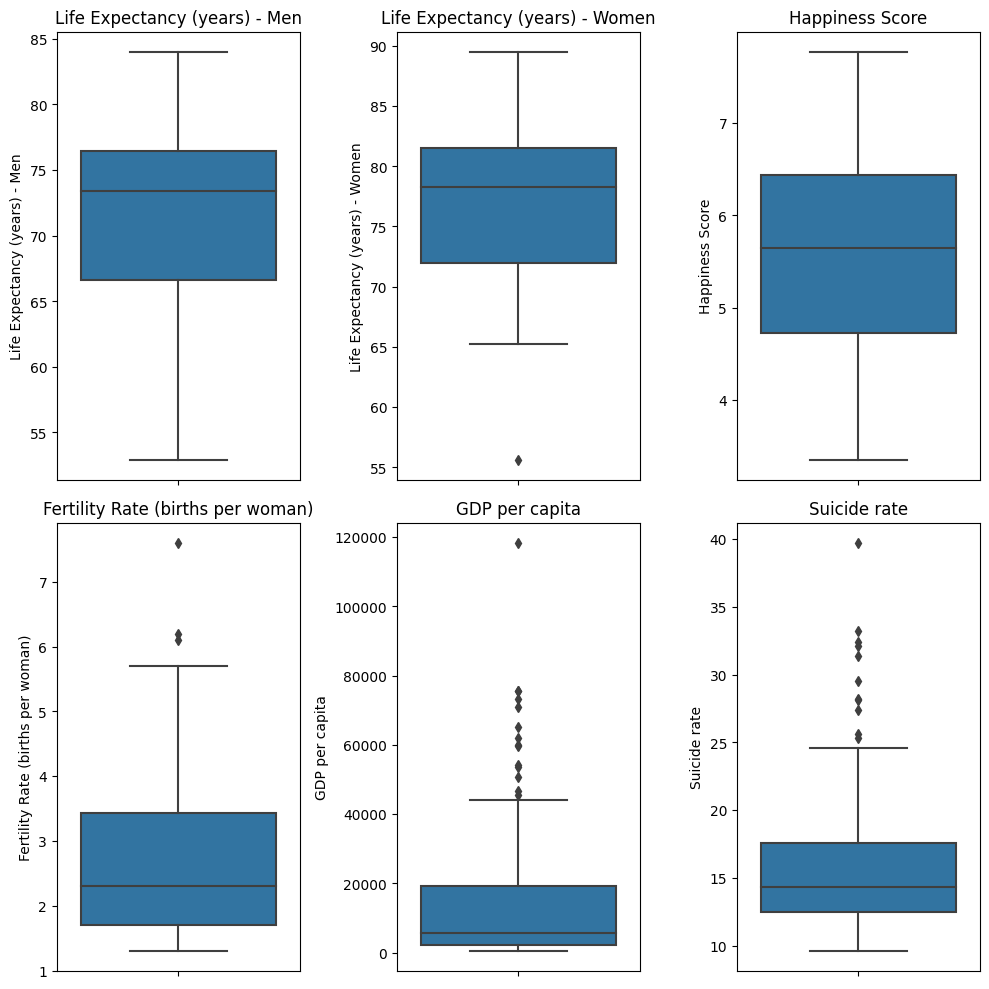

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,y=df[col[i]])

plt.tight_layout()
plt.show()

**2) Histplot by features**

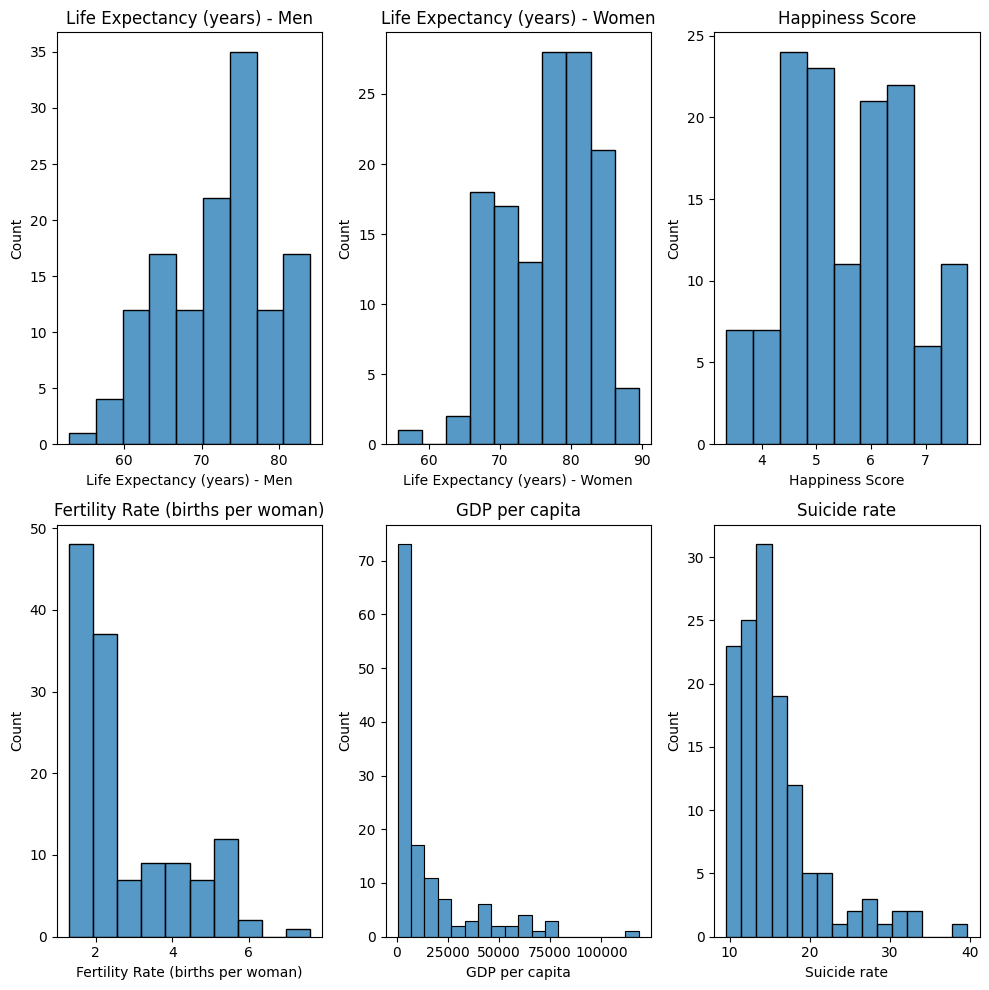

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.histplot(data=df,x=df[col[i]])

plt.tight_layout()
plt.show()

**3) Correlation heatmap**

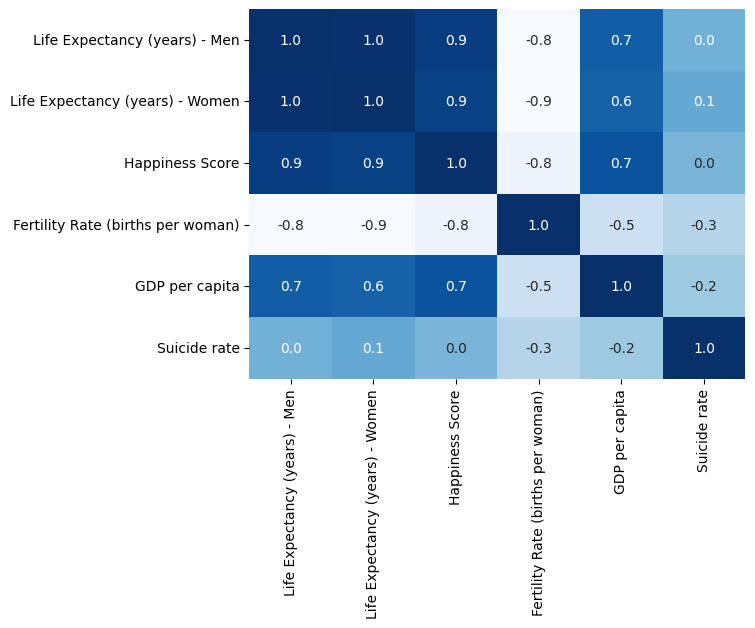

In [ ]:
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f');

* We can not find strong correlation between 'Life Expectancy' and 'Suicide Rate'( 0 and 0.1).
* We can find weak neagtive correlation between 'Fertility Rate (births per woman)' and 'Suicide Rate'(-0.3).
* We can also find weak neagtive correlation between 'GDP per capita' and 'Suicide Rate'(-0.2).
* On the other hand, we can find strong negative correlation between 'Life Expectancy' and 'Fertility Rate (births per woman)'(-0.8 and -0.9).
* We can also find strong positive correlation between 'Life Expectancy' and 'GDP per capita'(0.7 and 0.6).

**4) Pairplot by features**

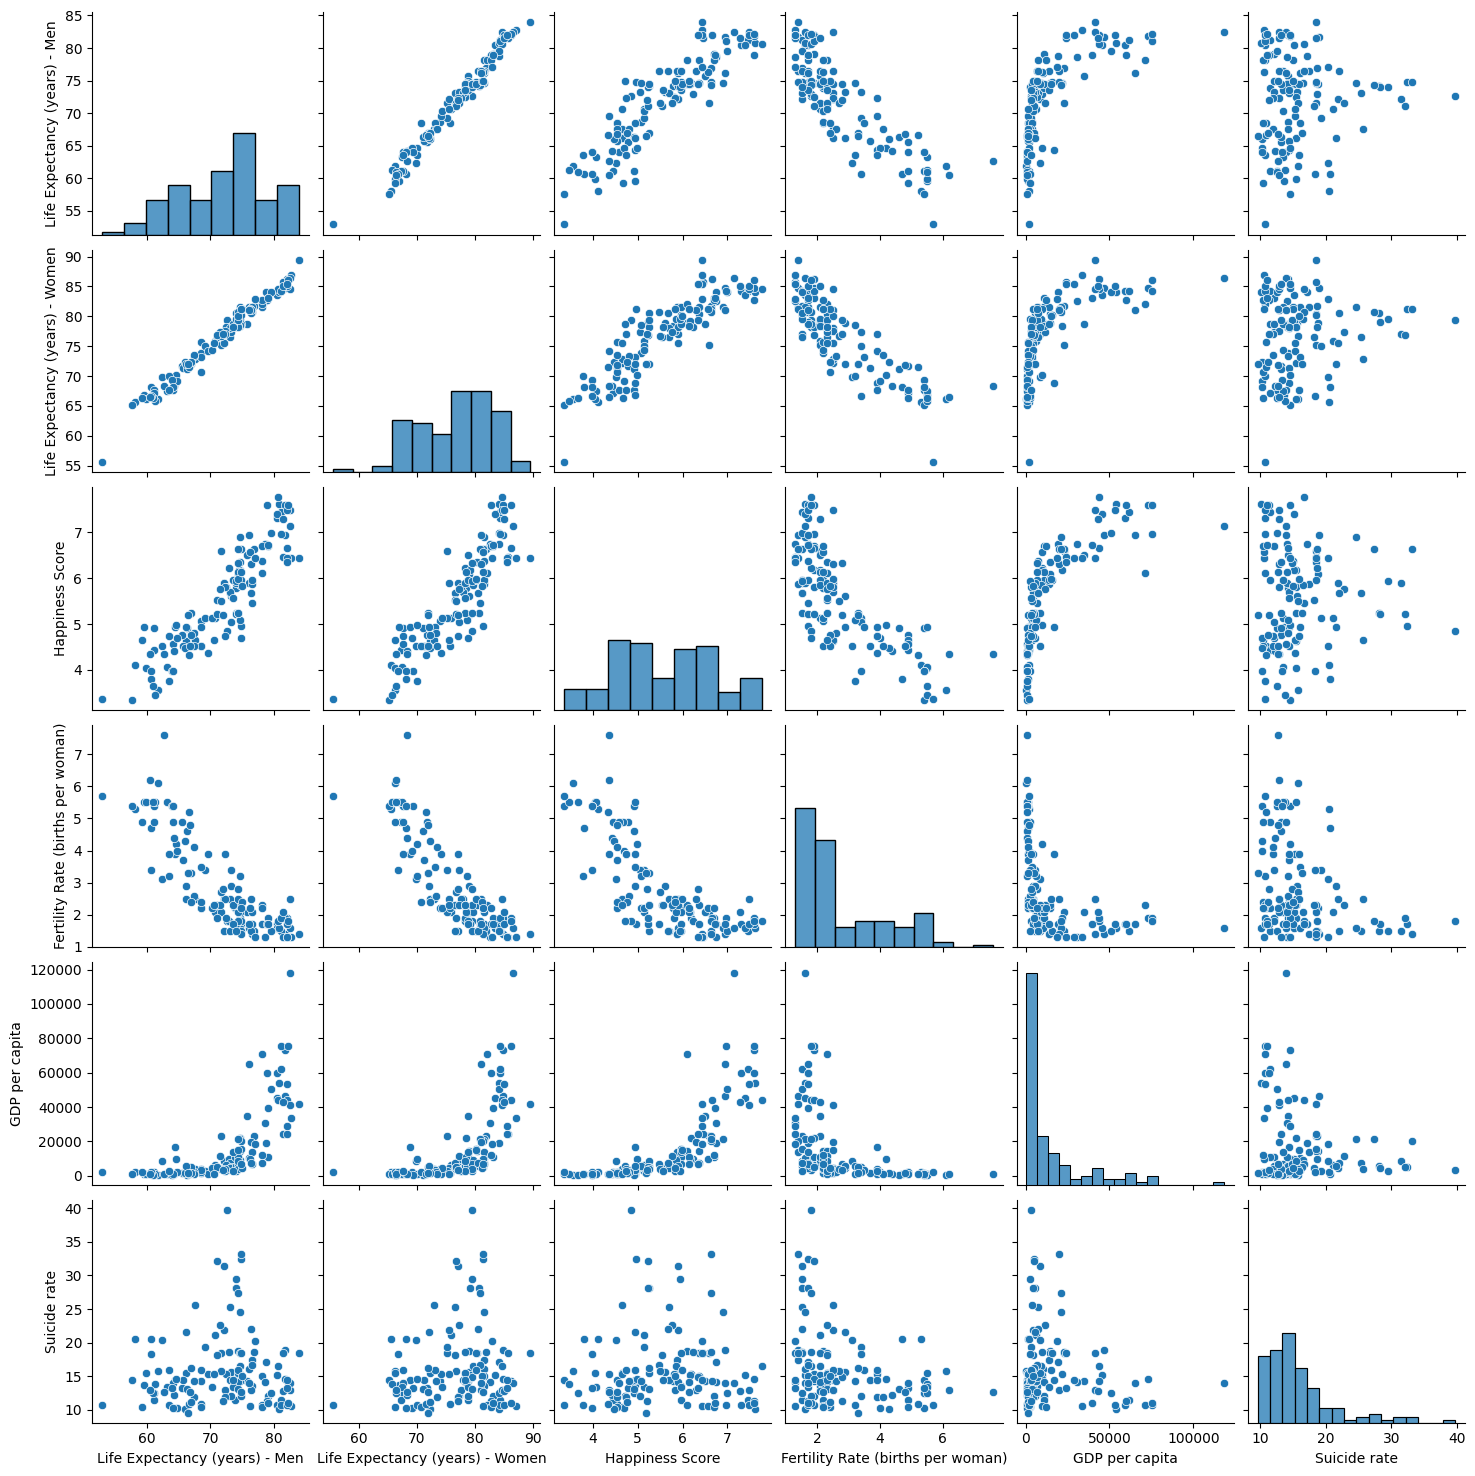

In [ ]:
sns.pairplot(df);

## Clustering

In [ ]:
df1=df.drop('Country',axis=1)

**1) Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df1)
df_sc = pd.DataFrame(df_sc, columns=df1.columns)

In [ ]:
df_sc.head()

Life Expectancy (years) - Men  Life Expectancy (years) - Women  \
0                      -1.668725                        -1.374873   
1                       0.419577                         0.704209   
2                       0.198981                         0.323309   
3                       1.434315                         1.259689   
4                      -2.036384                        -1.787515   

   Happiness Score  Fertility Rate (births per woman)  GDP per capita  \
0        -1.657269                           1.375441       -0.681976   
1        -0.575992                          -0.781687       -0.497687   
2         0.023583                           0.081165       -0.516853   
3         1.276565                          -0.997399        1.509889   
4        -1.368619                           1.806867       -0.635169   

   Suicide rate  
0      0.875343  
1      3.048494  
2     -0.045483  
3      0.562262  
4      0.856927

**2) Elbow method to find the number of clusters**

In [ ]:
from sklearn.cluster import KMeans

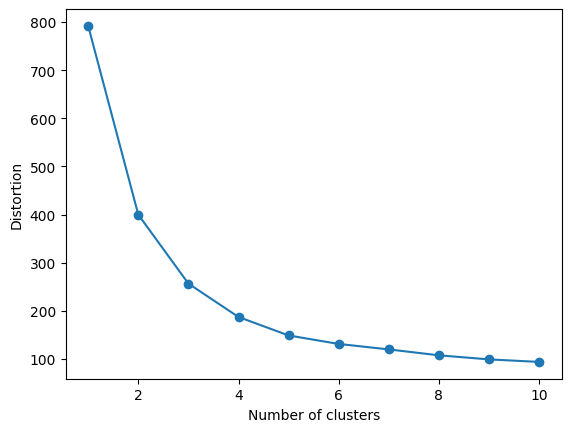

In [ ]:
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_sc)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

* 4 clusters seems to be better.

**3) Modeling**

In [ ]:
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_sc)

KMeans(n_clusters=4, random_state=1)

In [ ]:
cluster = model.labels_

In [ ]:
df['Cluster']=cluster

**4) Features by clusters**

In [ ]:
df.groupby('Cluster').mean().style.bar(axis=0)

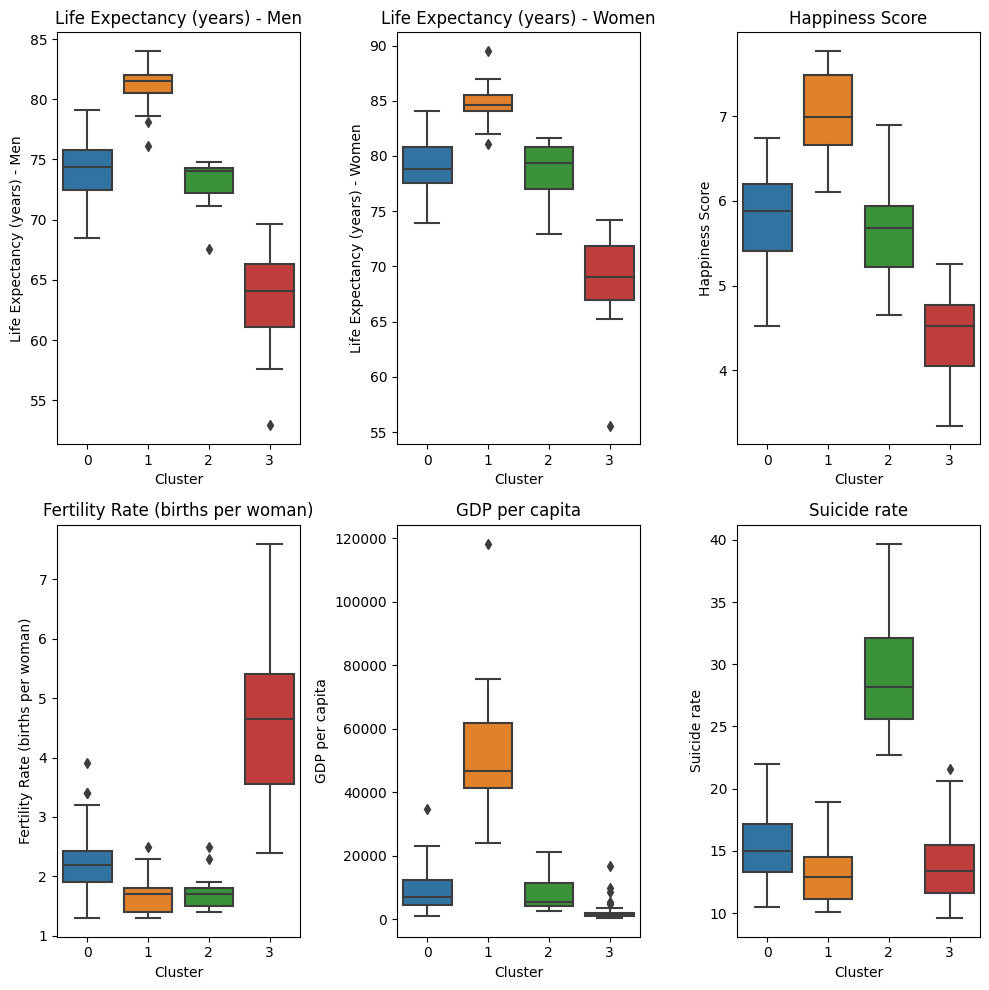

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,y=df[col[i]],x=df['Cluster'])

plt.tight_layout()
plt.show()

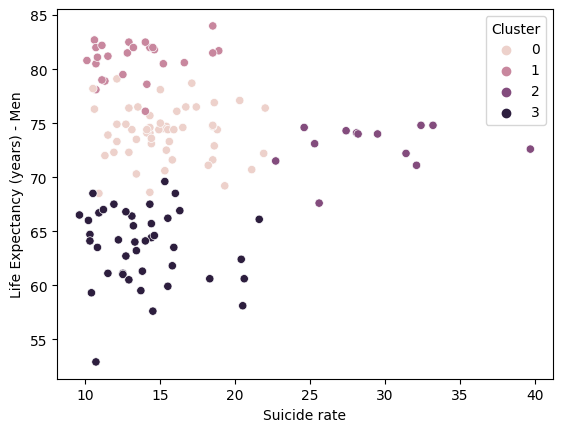

In [ ]:
sns.scatterplot(data=df, y='Life Expectancy (years) - Men',x='Suicide rate',hue='Cluster');

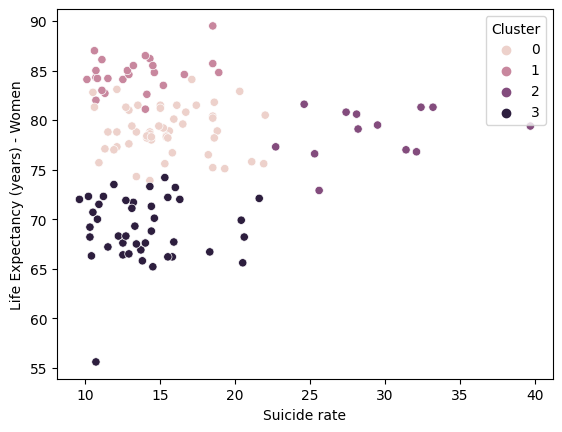

In [ ]:
sns.scatterplot(data=df, y='Life Expectancy (years) - Women',x='Suicide rate',hue='Cluster');

In [ ]:
print(df[df['Cluster']==0][['Country']].head())

                Country
2               Algeria
5   Antigua and Barbuda
6             Argentina
10           Azerbaijan
11              Bahamas


In [ ]:
print(df[df['Cluster']==1][['Country']].head())

      Country
3     Andorra
8   Australia
9     Austria
16    Belgium
29     Canada


In [ ]:
print(df[df['Cluster']==2][['Country']].head())

                   Country
1                  Albania
7                  Armenia
15                 Belarus
21  Bosnia and Herzegovina
24                Bulgaria


In [ ]:
print(df[df['Cluster']==3][['Country']].head())

         Country
0    Afghanistan
4         Angola
18         Benin
22      Botswana
25  Burkina Faso


* We can find a lot of gap between Cluster1 and Cluster3 except in 'Suicide Rate'.
* But we can not find outstanding gap in 'Suicide Rate' between Cluster1 and Cluster3.

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(df_sc)
feature = pca.transform(df_sc)

In [ ]:
df['PCA1']=feature[:,0]
df['PCA2']=feature[:,1]

In [ ]:
df.groupby('Cluster')['PCA1','PCA2'].mean().T.style.bar(axis=1)

In [ ]:
pd.DataFrame(pca.components_,columns=df_sc.columns,index=['PCA1','PCA2'])

Life Expectancy (years) - Men  Life Expectancy (years) - Women  \
PCA1                      -0.479326                        -0.477211   
PCA2                      -0.015316                         0.048810   

      Happiness Score  Fertility Rate (births per woman)  GDP per capita  \
PCA1        -0.464486                           0.431006       -0.372384   
PCA2        -0.099699                          -0.283971       -0.361399   

      Suicide rate  
PCA1     -0.048289  
PCA2      0.881019

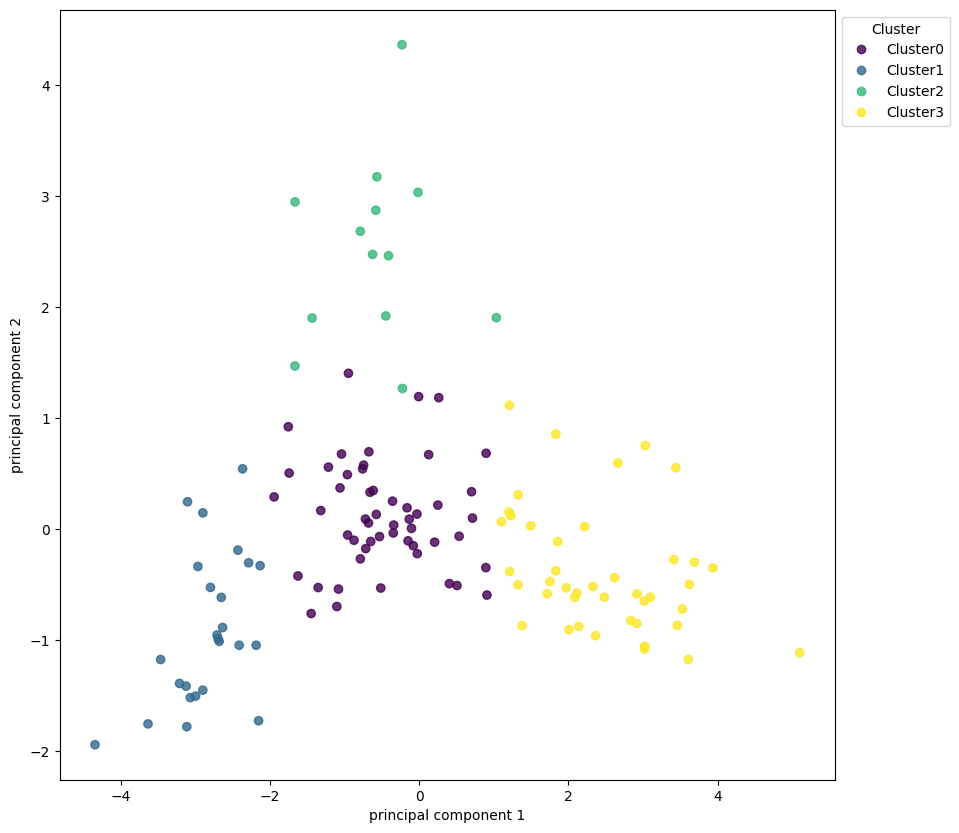

In [ ]:
fig=plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

scatter=ax.scatter(df['PCA1'], df['PCA2'],alpha=0.8, c=cluster)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster0','Cluster1','Cluster2','Cluster3'],
           title="Cluster",loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_)

0
0  0.688899
1  0.193780

* We can find huge gap between Cluster1 and Cluster3 in PCA1.

# Step 5: Causal Inference by LiNGAM

**1) Importing**

In [ ]:
pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.2 which is incompatible.


In [ ]:
pip install pygam

In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 20.3 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=ca444b0c80dce245242c1d4b2338fc6c7c1d0a509c931bc424caebd63f0e2716
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
from IPython.display import Image

import graphviz
import lingam
from lingam.utils import make_dot, make_prior_knowledge

In [ ]:
df_list = df1.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

6
{'Life Expectancy (years) - Men': 0, 'Life Expectancy (years) - Women': 1, 'Happiness Score': 2, 'Fertility Rate (births per woman)': 3, 'GDP per capita': 4, 'Suicide rate': 5}


**2) Setting prior knowledge**
* 'GDP per capita' as exogenous_variable

In [ ]:
prior_knowledge = make_prior_knowledge(
    6,
exogenous_variables = [df_dict["GDP per capita"]])

**3) LiNGAM Modeling**

In [ ]:
model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df1)

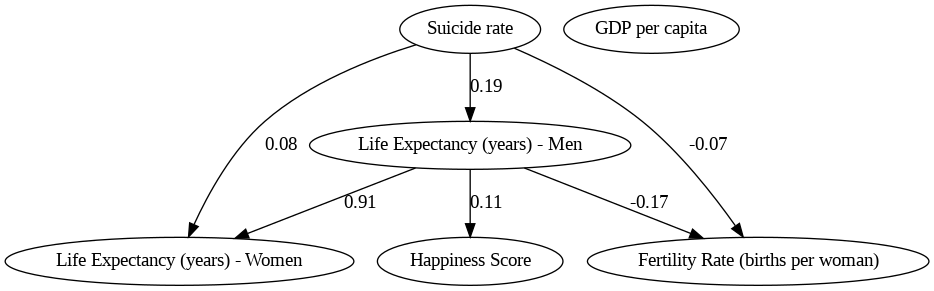

In [ ]:
dot = make_dot(
    model.adjacency_matrix_,
     labels=df1.columns.to_list(),
    )


dot.format = 'png'
dot.render('dag')

Image("dag.png")

**3)-1 LiNGAM Modeling with Linear Regression (Target Variable : "Life Expectancy (years) - Women" )**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(df1.drop(["Life Expectancy (years) - Women"], axis=1), df1["Life Expectancy (years) - Women"])

LinearRegression()

features:  [0, 1, 2, 3, 4]


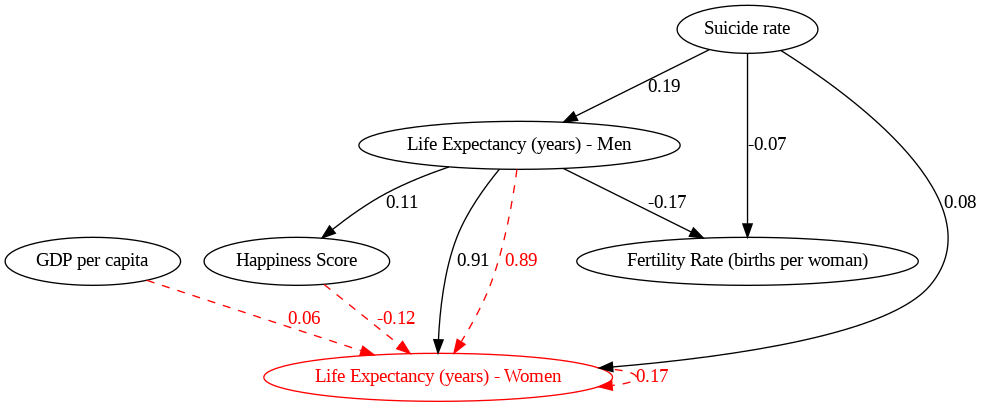

In [ ]:
features = [i for i in range(df1.drop(["Life Expectancy (years) - Women"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df1.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='Life Expectancy (years) - Women',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

**3)-2 LiNGAM Modeling with Linear Regression (Target Variable : "Life Expectancy (years) - Men" )**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(df1.drop(["Life Expectancy (years) - Men"], axis=1), df1["Life Expectancy (years) - Men"])

LinearRegression()

features:  [0, 1, 2, 3, 4]


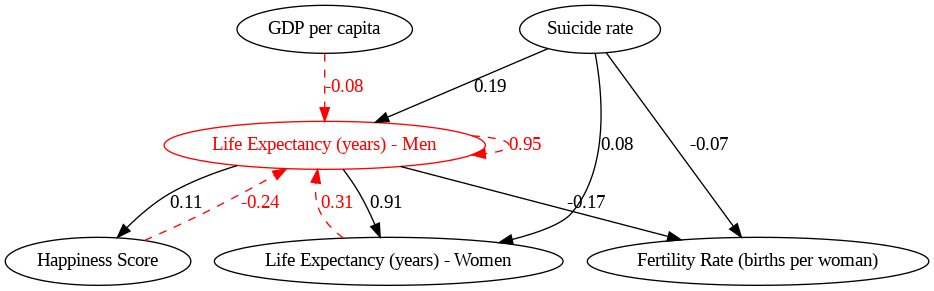

In [ ]:
features = [i for i in range(df1.drop(["Life Expectancy (years) - Men"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df1.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='Life Expectancy (years) - Men',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

After completing the model fitting process, the code creates a visual representation of the causal connections using the 'make_dot' function from the 'graphviz' library. This diagram, known as a causal graph, illustrates the causal relationships discovered by the LiNGAM algorithm. Each node in the graph corresponds to a variable from the input data, and the connections between these nodes signify the causal links identified by the algorithm. The orientation of these connections, indicated by the arrowheads, points from the causal variable to the affected variable, thereby mapping out the direction of causality.

* Suicide Rate may have some impact to "Life Expectancy (years) - Men" .
* If men live longer, it may have a lot of impact to "Life Expectancy (years) - Women"

# Conclusion

In conclusion, this notebook (Crash Course in Causality) has illuminated the vital role of causal inference in the field of data science and machine learning. Through this course, we've delved into various aspects of causality, from foundational concepts like the differentiation between correlation and causation, to more complex ideas involving counterfactual reasoning, potential outcomes, and the use of Directed Acyclic Graphs (DAGs). By exploring these concepts, we've equipped ourselves with a deeper understanding of how to discern and model causal relationships in data, a skill that's increasingly crucial in a data-driven world.

Worked Example 1 - Inferreing Causality in Water Quality and Worked Example 2 - Inferreing Causality in What Makes Life Expectancy Longer, employing the LiNGAM (Linear Non-Gaussian Acyclic Model) approach, serves as an exemplary application of these principles. This case study highlighted how causal analysis can be applied to real-world scenarios, demonstrating its significance in deriving actionable insights. By uncovering the causal factors influencing water quality / life expectancy, we gain a more nuanced understanding that goes beyond mere predictive accuracy. This knowledge enables more effective policy-making and intervention strategies, showcasing the transformative potential of causal inference in addressing complex societal issues.

With all these considerations in mind, Causal inference is an approach above and beyond current machine learning methods. The method of causal inference can actually solve a series of problems arising from current machine learning methods that only consider correlations through causality.

# Reference
* https://www.datasciencecentral.com/causality-the-next-most-important-thing-in-ai-ml/
* https://blogs.ams.org/blogonmathblogs/2017/04/10/divorce-and-margarine/
* https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb
* https://www.tandfonline.com/doi/full/10.1080/24709360.2019.1670513
* https://emmatomkinson.com/2013/05/20/randomised-controlled-trials-rcts-in-public-policy/
* https://atlas-scientific.com/blog/what-are-the-main-indicators-of-water-quality/
* https://ourworldindata.org/suicide
* https://www.bbc.com/news/world-us-canada-46389147




# License
Copyright [2023] [Yanyan Chen]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.